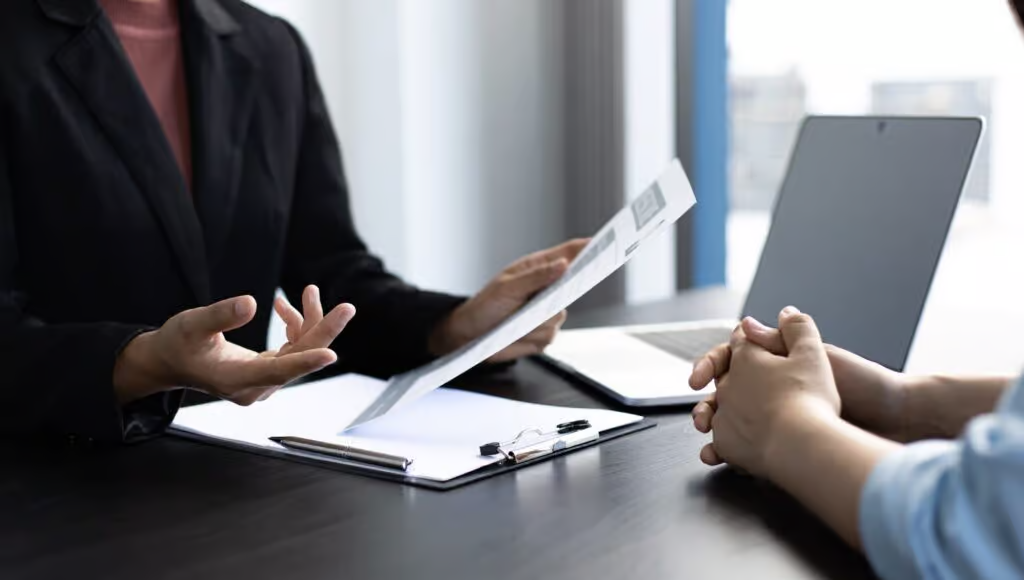

## ***HR EMPLOYEE ATTRITION***

La elección del dataset entre otros dos, nos representó un desafío interesante, ya que consideramos que el desgaste (Attrition) es un problema que afecta a todas las empresas, independientemente de su ubicación geográfica, sector y tamaño. El desgaste de los empleados genera costes significativos, incluidos los derivados de la interrupción del negocio, la contratación de nuevo personal y su formación. Se buscará conocer los factores que impulsan y minimizan la rotación de personal.


# **El Objetivo del modelo.**

El objetivo del modelo es predecir el abandono de los empleados en función de diversas características de estos. Se analizará cuales son los factores que generan un mayor desgaste laboral, que llevan a una posible deserción.


**Algunas preguntas que buscaremos responder:**

• ¿Cuáles son los factores que influyen en la tasa de abandono?

• ¿Cuál es la tasa de abandono? ¿Es alta o baja?

• ¿La distancia desde la casa al trabajo es un factor determinante para cambiar de trabajo?

• ¿Cuántas personas hay según los niveles de trabajo?

• ¿Qué nivel de estudio poseen?

• ¿Cuál es el grado de satisfacción con la empresa?

• ¿Cuál es el rango de salario en la empresa?

• ¿Cuánto más antigüedad en la empresa, mayor es el salario?

• ¿A mayor edad se incrementa el salario?

• ¿El salario aumenta respecto al nivel que tiene cada cargo?

• ¿Cómo es en general el nivel de balance entre el trabajo y la vida de los empleados?

• ¿Que relacion tienen los empleados con un mismo jefe con respecto al desgaste?

• ¿Qué recomendaciones se pueden dar a la dirección basándose en los análisis?


Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Conectamos y cargamos los datos

## **Dataset Employee Attrition**

In [3]:
df_empleados = pd.read_csv("C:\\Users\\claud\\OneDrive\\Escritorio\\- Proyectos  GitHub\\DeserciónLaboral\\Base de datos\\HR-Employee-Attrition.csv")
df_empleados.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


**Glosario**=

0) Age (Edad)

1) Attrition (Se siente desgastado);

2) BusinessTravel (Viajes de negocio);

3) DailyRate (Importe diario);

4) Department (Departamento);

5) DistanceFromHome (Distancia desde casa);

6) Education (Educación);

7) EducationField (Área educativa);

8) EmployeeCount (Número de empleados);

9) EmployeeNumber (Número de empleado);

10) EnvironmentSatisfaction (Satisfacción del ambiente laboral);

11) Gender (Genero);

12) HourlyRate (Importe por Hs.);

13) JobInvolvement (Participación);

14) JobLevel (Nivel);

15) JobRole (Rol);

16) JobSatisfaction (Satisfacción laboral);

17) MaritalStatus (Estado civil);

18) MonthlyIncome (Ingresos mensuales);

19) MonthlyRate (Importe mensual);

20) NumCompaniesWorked (Nro empresas trabajadas);

21) Over18 (Mayores de 18);

22) OverTime (Horas extras);

23) PercentSalaryHike (% aumento salarial);

24) PerformanceRating (Clasificación de rendimiento);

25) RelationshipSatisfaction (Relación satisfacción);

26) StandardHours (Horas comunes);

27) StockOptionLevel (Nivel de acciones);

28) TotalWorkingYears (Total años trabajados);

29) TrainingTimesLastYear (Tiempo de entrenamiento del año pasado);

30) WorkLifeBalance (Equilibrio vida-trabajo);

31) YearsAtCompany (Años en la empresa);

32) YearsInCurrentRole (Años en el rol actual);

33) YearsSinceLastPromotion (Años desde la última promoción);

34) YearsWithCurrManager (Años como gerente).


In [ ]:
df_empleados.shape

(2149, 35)

**Paleta de colores en gráficos**🎨

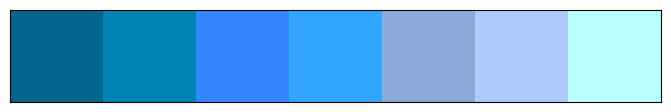

In [ ]:
custom_colors = ["#05668d","#0084B3","#3386FF","#33A7FF","#8cabda","#adcbfc","#b9ffff"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

## **Exploramos el conjunto de datos**

In [ ]:
df_empleados.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Estadísticas descriptivas para columnas numéricas**

In [ ]:
df_empleados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,37.05,9.25,18.0,30.0,36.0,43.0,60.0
DailyRate,2149.0,806.53,405.70,102.0,465.0,809.0,1158.0,1499.0
DistanceFromHome,2149.0,9.17,8.10,1.0,2.0,7.0,14.0,29.0
Education,2149.0,2.90,1.02,1.0,2.0,3.0,4.0,5.0
EmployeeCount,2149.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,2149.0,1075.00,620.51,1.0,538.0,1075.0,1612.0,2149.0
EnvironmentSatisfaction,2149.0,2.72,1.09,1.0,2.0,3.0,4.0,4.0
HourlyRate,2149.0,66.16,20.35,30.0,48.0,66.0,84.0,100.0
JobInvolvement,2149.0,2.73,0.71,1.0,2.0,3.0,3.0,4.0
JobLevel,2149.0,2.08,1.13,1.0,1.0,2.0,3.0,5.0




Hacemos una descripción de los datos en el dataset:

Las filas son los atributos (nombre de los campos) y las columnas nos da la cantidad de registros, los valores máximos y mínimos, los cuartiles, la media y la desviación estándar.


**Estadísticas de las columnas Categóricas.**

In [ ]:
describe = df_empleados.describe(include=['O'])
missing_rates = df_empleados[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,2149,2149,2149,2149,2149,2149,2149,2149,2149
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1795,1509,1432,894,1285,461,973,2149,1529
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_empleados.duplicated().any()

False

In [ ]:
missing_data = df_empleados.isnull()
missing_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


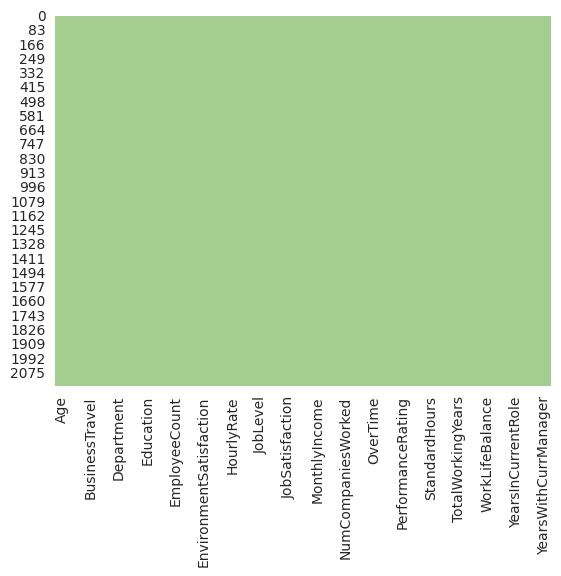

In [ ]:
sns.heatmap(df_empleados.isnull(),cmap = "crest",cbar = False);

Los datos no contienen valores nulos.

In [ ]:
df_empleados.duplicated().sum()

0

# **Clasificación de variables=**

Variable dependiente : Attrition (Abandono)

Variable independiente (31 variables diferentes en total) :


- Información básica:
      Edad, sexo, educación, campo educativo, estado civil, distancia del domicilio

- Información laboral:
      Departamento, Función, Nivel de puesto, Horas extras, Viajes de trabajo, Valoración del rendimiento, Nivel de opciones sobre acciones,
      Implicación en el trabajo

- Satisfacción:
      Equilibrio trabajo-vida privada, Satisfacción en el trabajo, Satisfacción en las relaciones, Satisfacción con el entorno

- Salario:
      Ingresos mensuales, tarifa mensual, tarifa diaria, tarifa por hora, porcentaje de aumento salarial

- Tiempo de trabajo:
      Años totales de trabajo,Tiempo de formación el último año,Años en la empresa,Años en el puesto actual,Años desde el último ascenso, Años con el jefe actual,Número de empresas en las que ha trabajado.

Establecemos el parámetro del Proyecto.

In [ ]:
target = "Attrition"
SCALING = True
OUTLIERS = True
DISTRIBUTION = True
sns.set_style("darkgrid")
pd.set_option('mode.chained_assignment',None)

In [ ]:
print("Primeras 5 filas de Target")
df_empleados[target].head()

Primeras 5 filas de Target


0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [ ]:
print("Información de columnas")
df_empleados.info()

Información de columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2149 non-null   int64 
 1   Attrition                 2149 non-null   object
 2   BusinessTravel            2149 non-null   object
 3   DailyRate                 2149 non-null   int64 
 4   Department                2149 non-null   object
 5   DistanceFromHome          2149 non-null   int64 
 6   Education                 2149 non-null   int64 
 7   EducationField            2149 non-null   object
 8   EmployeeCount             2149 non-null   int64 
 9   EmployeeNumber            2149 non-null   int64 
 10  EnvironmentSatisfaction   2149 non-null   int64 
 11  Gender                    2149 non-null   object
 12  HourlyRate                2149 non-null   int64 
 13  JobInvolvement            2149 non-null   int64 
 14  

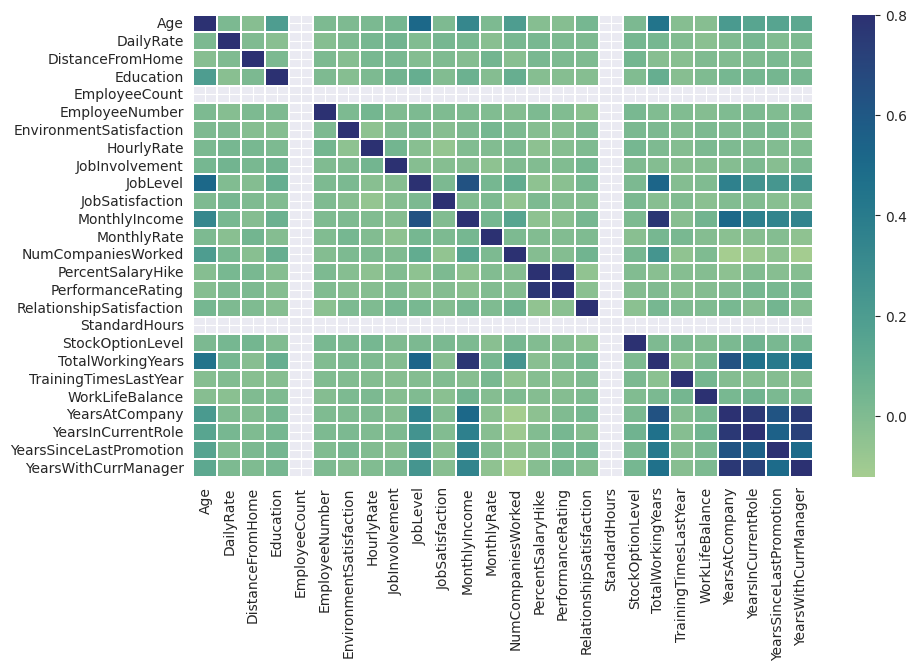

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_empleados.corr(),vmax=0.8,linewidth=0.1,cmap="crest")
plt.show()

De esta visualización podemos destacar a primera vista que:

Los años trabajados tiene una relación positiva con el nivel de empleo y los ingresos mensuales. Tambien podemos ver una buena relación entre los años que tienen en la empresa, el puesto actual y los años con el directivo actual.

Análisis de Target (Attrition)

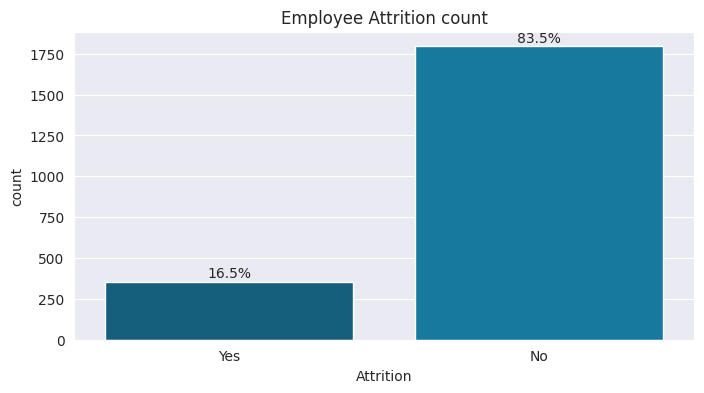

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
sns.countplot(x= df_empleados[target])
plt.title("Employee Attrition count")

total = len(df_empleados)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

## Limpieza de Datos

Eliminamos columnas que sólo tienen un valor

In [ ]:
for i in df_empleados.columns:
    if df_empleados[i].nunique()==1:
       df_empleados.drop(i,axis=1,inplace=True)

In [ ]:
df_empleados.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_empleados.shape

(2149, 32)

Extraemos las columnas categóricas, y las columnas numéricas en una lista separada, para facilitar la EDA

In [ ]:
def get_num_cat_cols(df):

    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)

    return num_cls, cat_cls

In [ ]:
num_cols, cat_cols = get_num_cat_cols(df_empleados)

Numerical columns 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical columns 
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


**Distribución de las variables numéricas.**

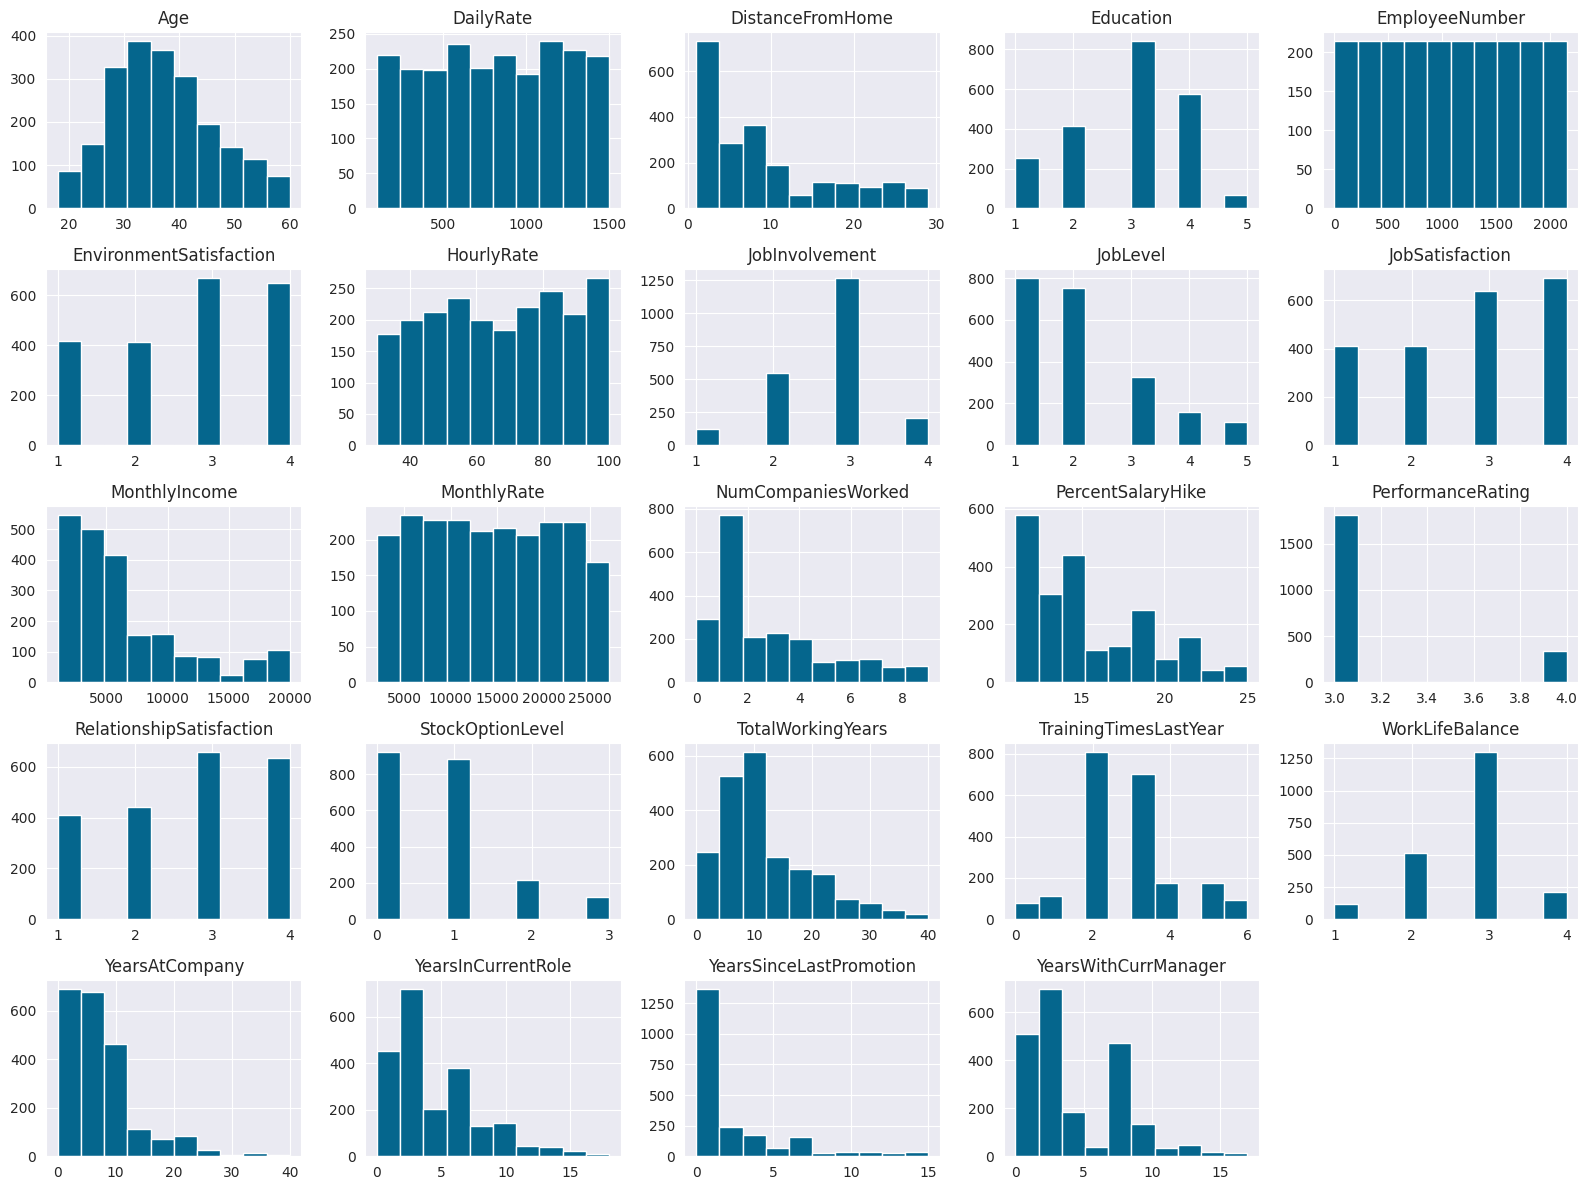

In [ ]:
df_empleados.hist(figsize=(16,12))
plt.tight_layout()

**Exploramos los valores únicos, con recuentos en variables categóricas, y buscamos caracteres especiales para realizar la limpieza.**

In [ ]:
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(df_empleados[c].value_counts())

----------------------------------------------------------------------------------------------------
Column Name - Attrition
----------------------------------------------------------------------------------------------------
No     1795
Yes     354
Name: Attrition, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - BusinessTravel
----------------------------------------------------------------------------------------------------
Travel_Rarely        1509
Travel_Frequently     417
Non-Travel            223
Name: BusinessTravel, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - Department
----------------------------------------------------------------------------------------------------
Research & Development    1432
Sales                      631
Human Resources             86
Name: Department, dtype: int64
-------------------------

In [ ]:
categorical = [col for col in df_empleados.select_dtypes("object").columns if col!=target]
print("Categorical Columns:",categorical)

Categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


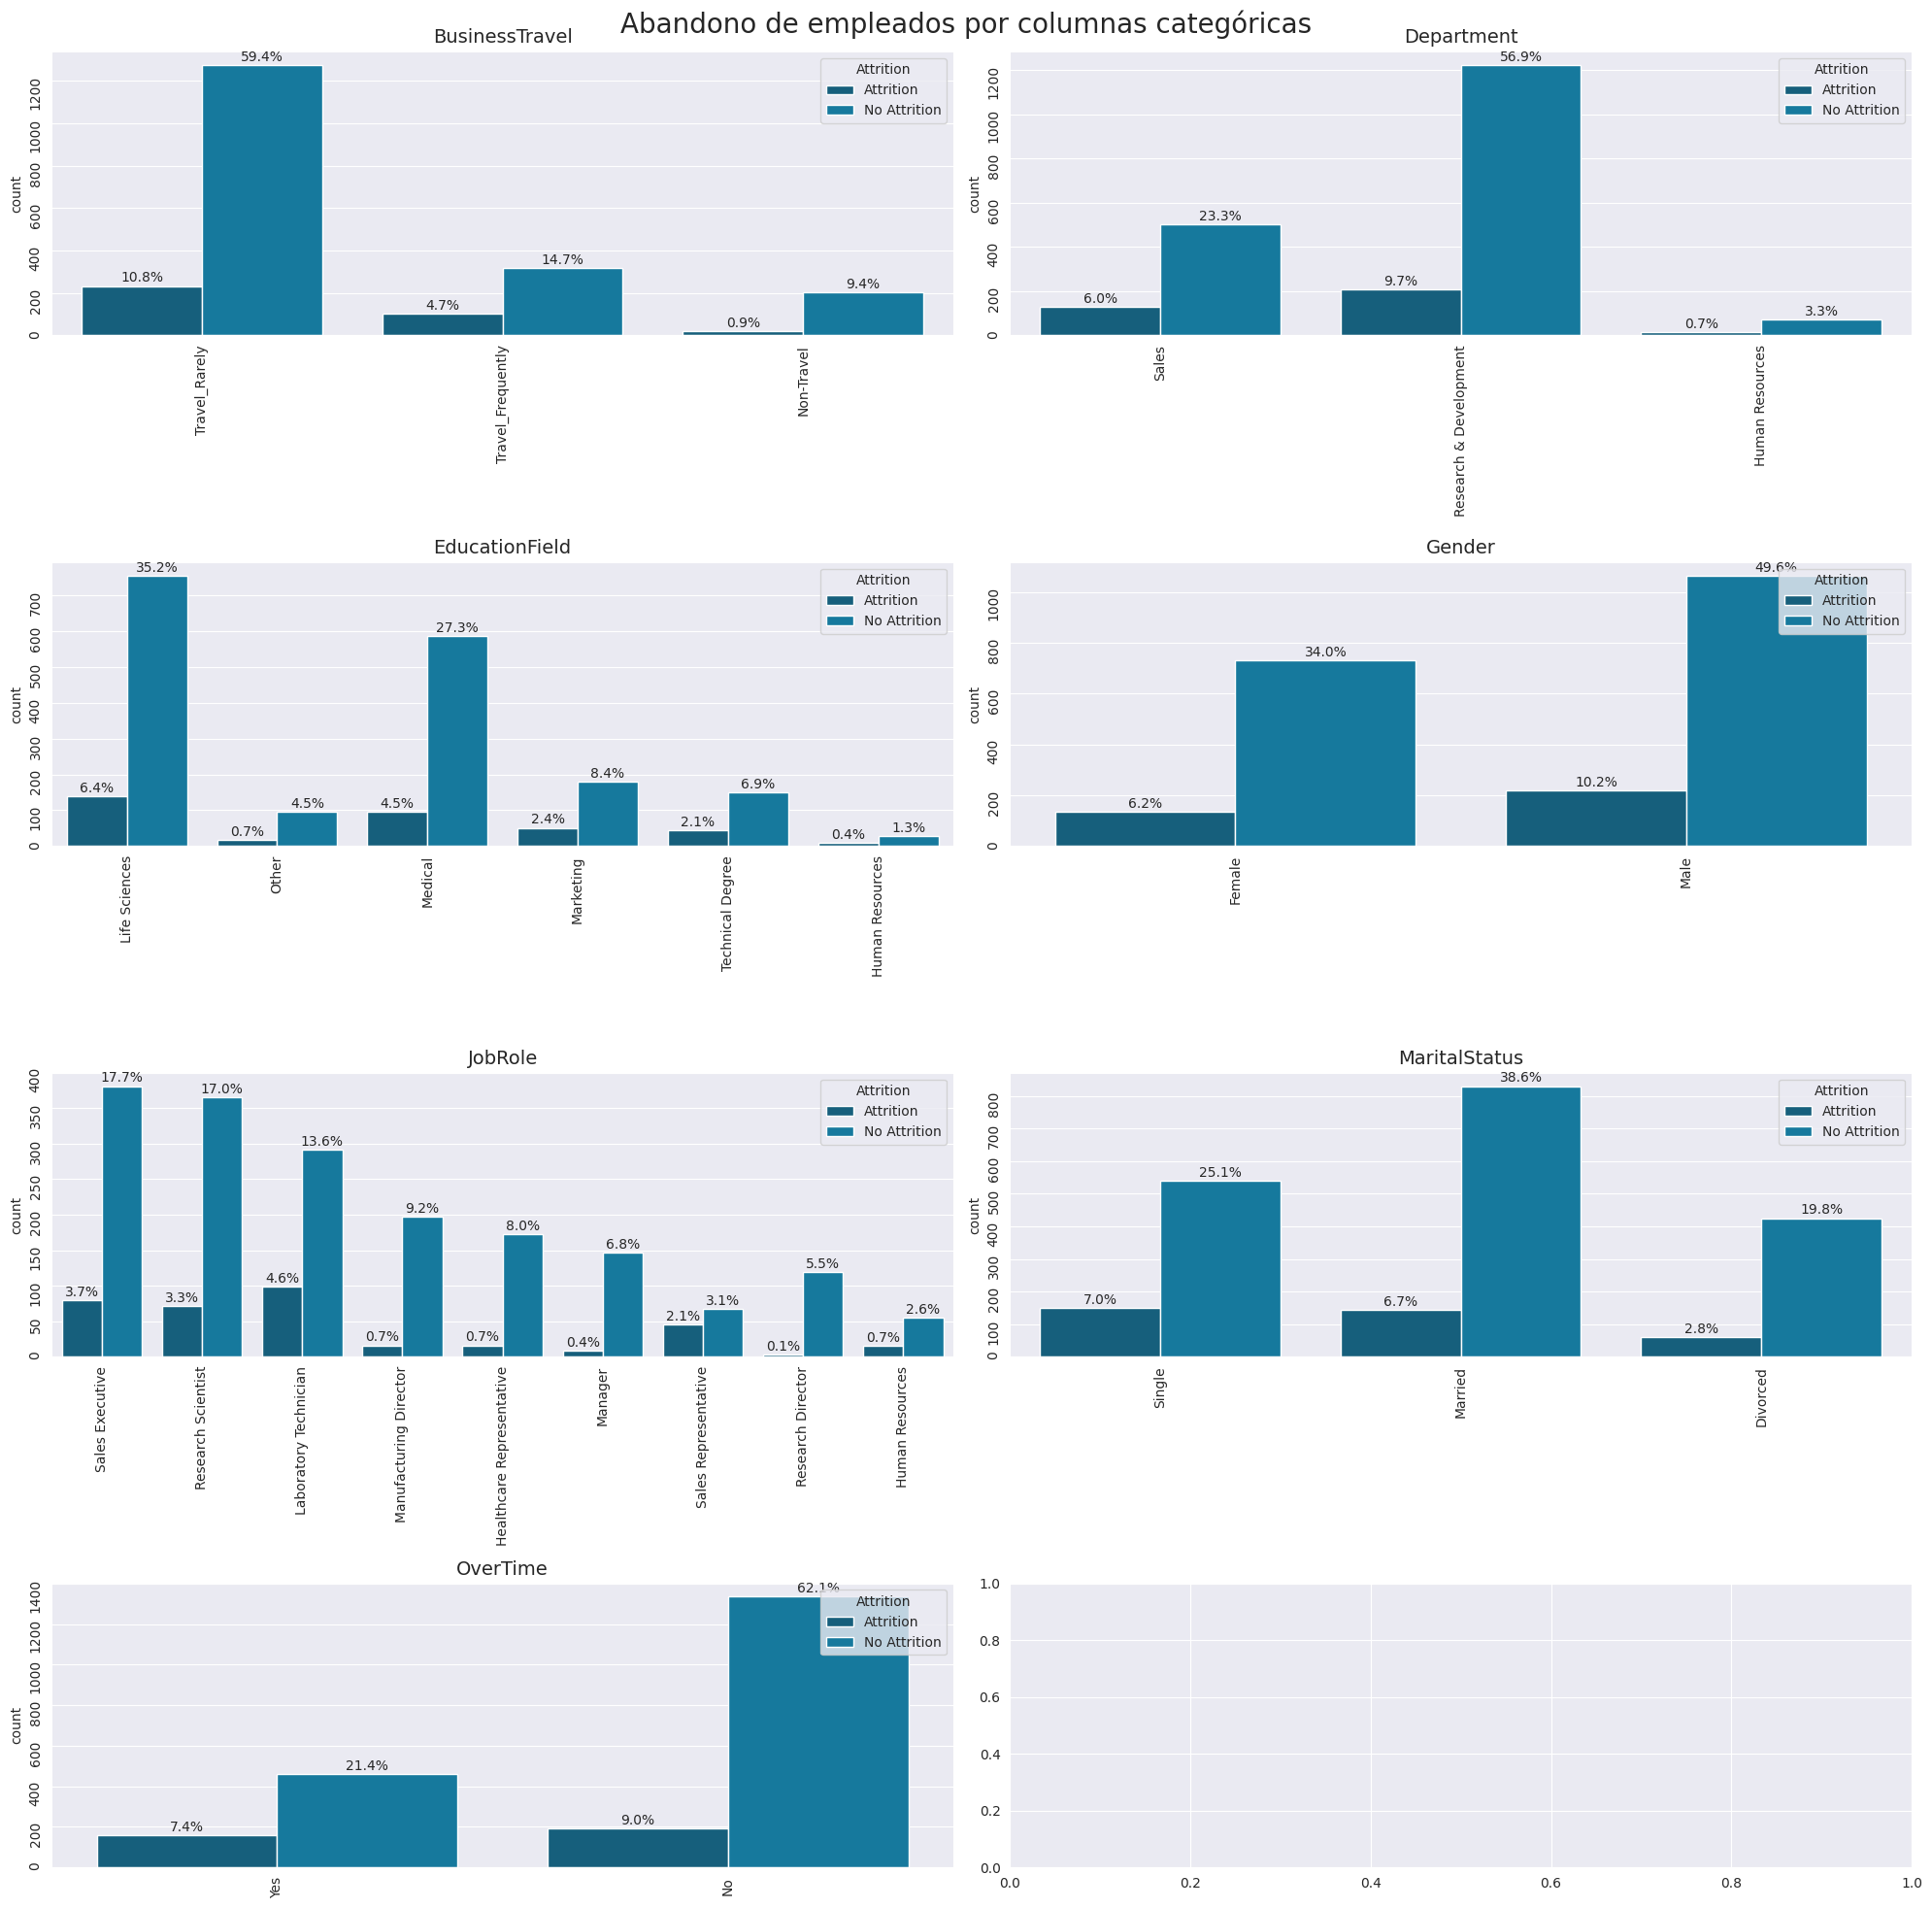

In [ ]:
if len(categorical)>0:
    fig,ax = plt.subplots(4,2,figsize = (20,20))
    total = len(df_empleados)
    ax = np.ravel(ax)

    for i,col in enumerate(categorical):
        sns.countplot(ax = ax[i],x = df_empleados[col], hue=df_empleados[target])
        ax[i].tick_params(labelrotation=90)
        ax[i].set_title(f"{col}",fontsize = 14)
        ax[i].legend(title='Attrition', loc='upper right', labels=['Attrition', 'No Attrition'])
        ax[i].set(xlabel=None)

        for p in ax[i].patches:
            percentage = f'{100 * p.get_height() / total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax[i].annotate(percentage, (x, y), ha='center', va='center')

    fig.suptitle("Abandono de empleados por columnas categóricas",fontsize = 20)
    plt.tight_layout()
    plt.show()

# **Conversión de variable Target**

Yes = 1

No = 0

In [ ]:
df_empleados.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [ ]:
print("Primeras 5 filas de Target")
df_empleados[target].head()

Primeras 5 filas de Target


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

0    1795
1     354
Name: Attrition, dtype: int64


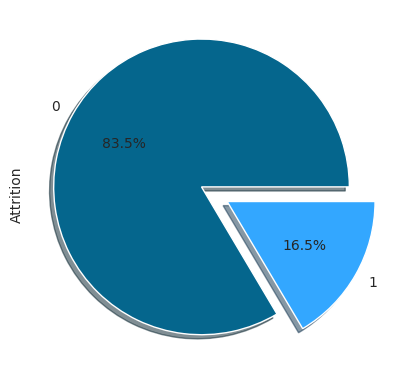

In [ ]:
df_empleados['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors = ["#05668d","#33A7FF"])
print(df_empleados['Attrition'].value_counts())

El 16% de los empleados han abandonado la empresa. Nuestro target está desequilibrado, lo que podría ser un problema para el conjunto de datos, ya que está claramente sesgado a favor de los empleados que optan por permanecer en la empresa.

**Tranformamos los datos de las columnas= Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance.**


In [ ]:
educacion = {1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'}
df_empleados = df_empleados.replace({'Education':educacion})


Satisfacción_Ambiental = {1:'Low',2:'Medium',3:'High',4:'Very High'}
df_empleados = df_empleados.replace({'EnvironmentSatisfaction':Satisfacción_Ambiental})


Implicación_en_el_trabajo = {1:'Low',2:'Medium',3:'High',4:'Very High'}
df_empleados = df_empleados.replace({'JobInvolvement':Implicación_en_el_trabajo})


Satisfacción_laboral = {1:'Low',2:'Medium',3:'High',4:'Very High'}
df_empleados = df_empleados.replace({'JobSatisfaction':Satisfacción_laboral})


Clasificación_de_Rendimiento = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}
df_empleados = df_empleados.replace({'PerformanceRating':Clasificación_de_Rendimiento})


Satisfacción_de_la_relación = {1:'Low',2:'Medium',3:'High',4:'Very High'}
df_empleados = df_empleados.replace({'RelationshipSatisfaction':Satisfacción_de_la_relación})


Equilibrio_trabajo_vida = {1:'Bad',2:'Good',3:'Better',4:'Best'}
df_empleados = df_empleados.replace({'WorkLifeBalance':Equilibrio_trabajo_vida})

#Mostramos los cambios
df_empleados

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,3,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,4,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,5,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,29,0,Travel_Rarely,1246,Sales,19,Bachelor,Life Sciences,2145,High,Male,77,Medium,2,Sales Executive,High,Married,5296,20156,1,No,17,Excellent,Medium,1,8,3,Better,8,7,7,7
2145,30,0,Travel_Rarely,330,Human Resources,1,Bachelor,Life Sciences,2146,High,Male,46,High,1,Human Resources,Very High,Single,6781,17078,3,No,23,Outstanding,Medium,0,14,6,Better,1,0,0,0
2146,55,0,Travel_Rarely,1229,Research & Development,4,Master,Life Sciences,2147,Very High,Male,30,High,2,Healthcare Representative,Medium,Single,2174,9150,1,Yes,11,Excellent,High,0,3,3,Better,3,2,1,2
2147,33,0,Travel_Rarely,1099,Research & Development,4,Master,Medical,2148,Low,Female,82,Medium,1,Laboratory Technician,Very High,Single,6653,15276,4,No,15,Excellent,Medium,0,7,6,Better,1,0,0,0


Listado de Valores

In [ ]:
df_empleados.values

array([[41, 1, 'Travel_Rarely', ..., 4, 0, 5],
       [49, 0, 'Travel_Frequently', ..., 7, 1, 7],
       [37, 1, 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [55, 0, 'Travel_Rarely', ..., 2, 1, 2],
       [33, 0, 'Travel_Rarely', ..., 0, 0, 0],
       [47, 0, 'Travel_Rarely', ..., 9, 1, 12]], dtype=object)

No posee valores nulos

In [ ]:
df_empleados.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**Relación entre los empleados y los departamentos.**

<Axes: ylabel='EmployeeNumber'>

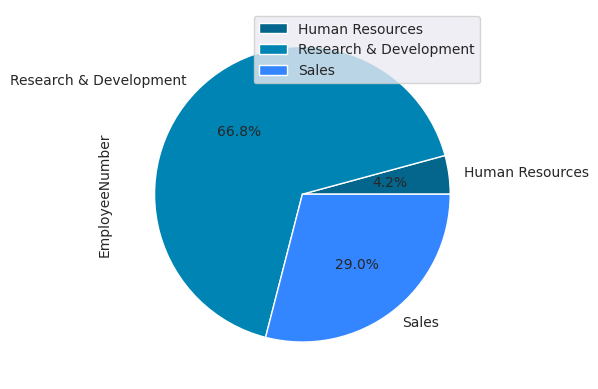

In [ ]:
df_empleados.groupby(['Department']).sum().plot(kind='pie', y='EmployeeNumber',autopct='%1.1f%%')

Un 68% trabaja en el Departamento de Investigación y Desarrollo, un 29% en Ventas y el 4% en RRHH.

**Relación YearsAtCompany(Años en la empresa) y YearsInCurrentRole(Años en el puesto actual).**

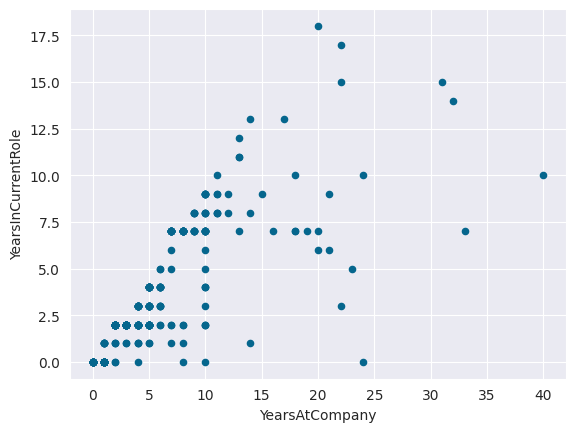

In [ ]:
at = df_empleados[df_empleados.Attrition == 1]
ax1 = at.plot.scatter(x='YearsAtCompany',y='YearsInCurrentRole')

Con el gráfico de dispersión se puede ver la intensidad de la relación entre los años que el empleado pertenece a la companía en comparación con los años que tiene la misma posición, tomando los empleados que sienten un desgaste en su trabajo. Como se puede observar vemos la mayor intensidad entre los 5 y 10 años que pertenecen a la companía.

Distribució de Job Level.

In [ ]:
df_empleados["JobLevel"].value_counts()

1    802
2    752
3    328
4    157
5    110
Name: JobLevel, dtype: int64

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

## **EDA**

Exploramos el conjunto de datos, observamos la distribución de características, cómo de correlaciones entre ellas, y creamos algunas visualizaciones.

**Gender(Genero) vs Attrition.**

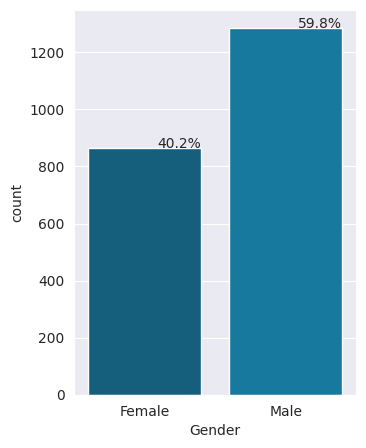

In [ ]:
plt.figure(figsize=(8,5))
total = float(len(df_empleados))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=df_empleados)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.show()

Se ve que los hombre tienen más posibilidad de Attrition.

**Distribución por la edad.**

Age(Edad) vs Attrition.

<Axes: xlabel='Age', ylabel='Count'>

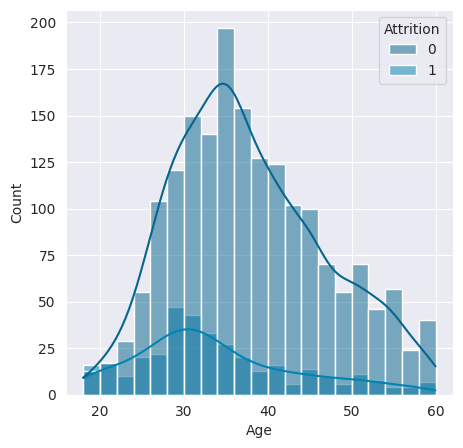

In [ ]:
plt.figure(figsize = (5, 5))
sns.histplot(x = 'Age', hue = 'Attrition', data = df_empleados, kde=True )

La mayoría de los empleados tienen entre 28 y 36 años, mientras que el rango de edad es de 18 a 60 años.

La empresa parece depender en gran medida del segmento de empleados menores de 40 años.

Se puede observar un patrón cercano en el que los empleados más jóvenes tienen una mayor probabilidad de desgaste hasta alrededor de los 35 años.

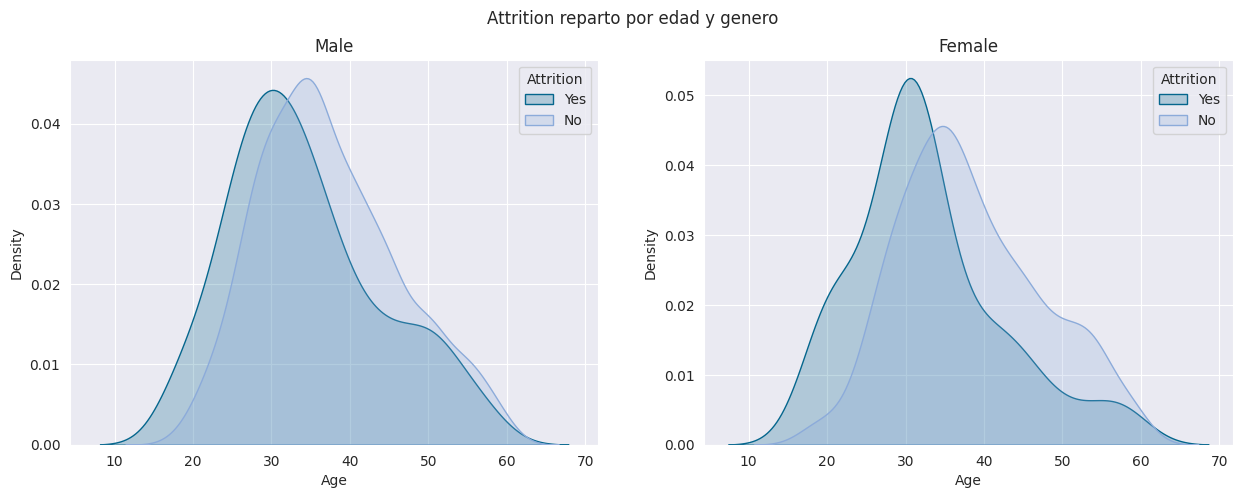

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition reparto por edad y genero')
sns.kdeplot(ax=axes[0],x=df_empleados[(df_empleados['Gender']=='Male')&(df_empleados['Attrition']==1)]['Age'], color='#05668d', fill=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df_empleados[(df_empleados['Gender']=='Male')&(df_empleados['Attrition']==0)]['Age'], color='#8cabda', fill=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df_empleados[(df_empleados['Gender']=='Female')&(df_empleados['Attrition']==1)]['Age'], color='#05668d', fill=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df_empleados[(df_empleados['Gender']=='Female')&(df_empleados['Attrition']==0)]['Age'], color='#8cabda', fill=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

**La distancia al domicilio.**

**DistanceFromHome(Distancia al domicilio) vs Attrition.**

<Axes: xlabel='DistanceFromHome', ylabel='count'>

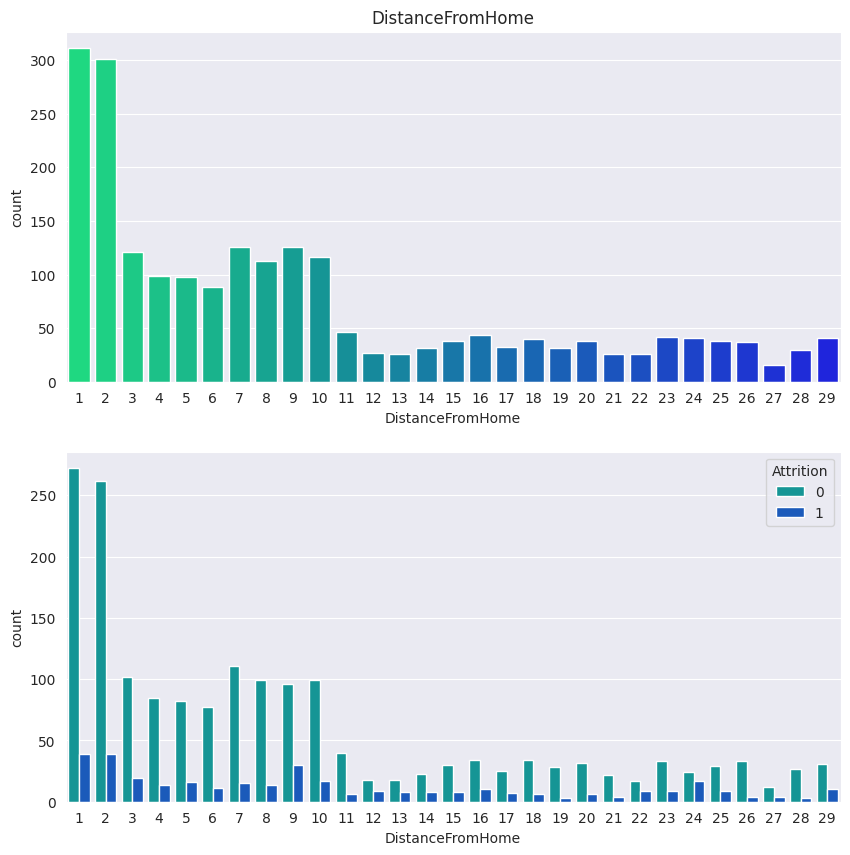

In [ ]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
sns.countplot(x= 'DistanceFromHome' ,data =df_empleados ,palette='winter_r')
plt.title('DistanceFromHome')
plt.subplot(2,1,2)
sns.countplot(x= 'DistanceFromHome' ,data = df_empleados ,palette='winter_r'  ,hue =df_empleados['Attrition'])

La mayoría de los empleados se encuentran a una distancia entre 1 y 10 km.

Los empleados tienden a Attrition cuando la distancia a su domicilio es superior a 10 km

**Education(Nivel de educación) vs Attrition.**

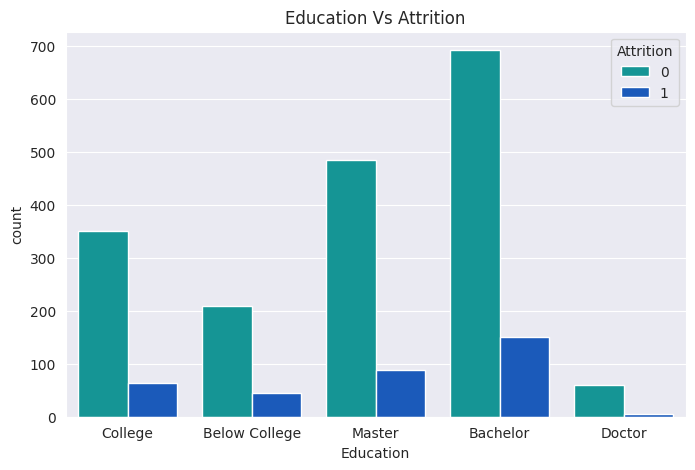

In [ ]:
plt.figure(figsize=(8,5))
df_empleados['Education'] = df_empleados['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctor'])
sns.countplot(x= 'Education' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.title('Education Vs Attrition')
plt.show()

Quienes tienen el nivel de educacion "Bachelor", tienen mayor probabilidad de Attrition.

**MaritalStatus(Estado civil) vs Attrition.**

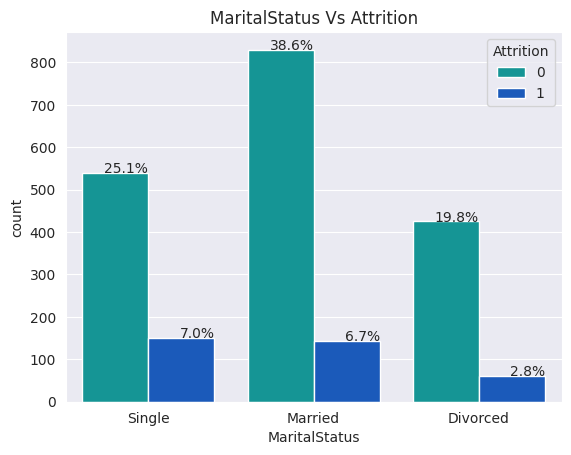

In [ ]:
a=sns.countplot(x= 'MaritalStatus' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.title('MaritalStatus Vs Attrition')
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='right')

plt.show()

El empleado cuyo estatus es "Single" tiene claros indicios de Attrition, mientras que los demás, que están casados tienden a ser estables.

**Department(Departamento) vs Attrition.**

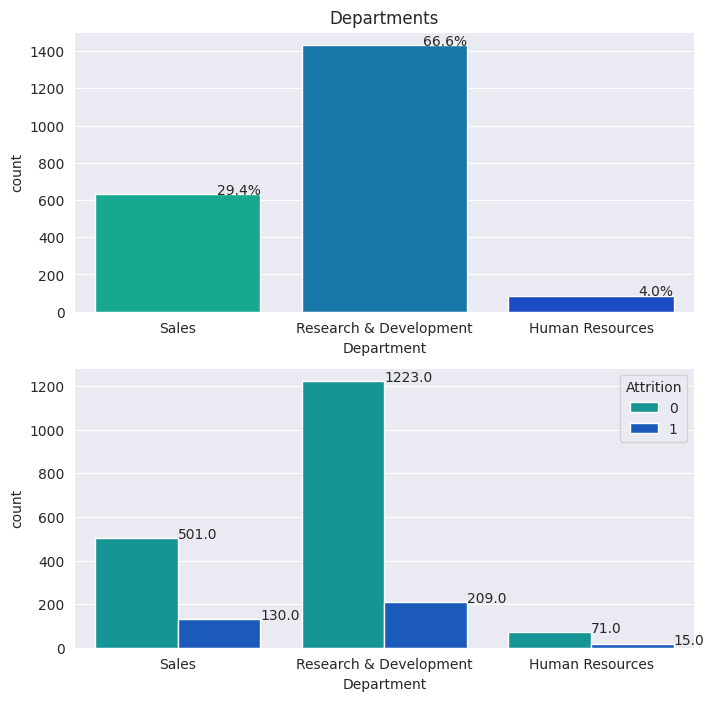

In [ ]:
plt.figure(figsize = (8 , 8))
plt.subplot(2 ,1,1)
q=sns.countplot(x= 'Department' ,data = df_empleados ,palette='winter_r',)
plt.title('Departments')
for p in q.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    q.annotate(percentage, (x, y),ha='right')
plt.subplot(2,1,2)
u=sns.countplot(x= 'Department' ,data = df_empleados ,palette='winter_r'  ,hue =df_empleados['Attrition'])
for p in u.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #u.annotate(percentage, (x, y),ha='left')
    u.annotate(y,(x,y),ha='left')
plt.show()

La tasa de abandono en el Dpto. de Ventas es la más alta, superando al Dpto. de R&d y RRHH.

**Job Role (Rol) vs Attrition.**

<Axes: xlabel='count', ylabel='JobRole'>

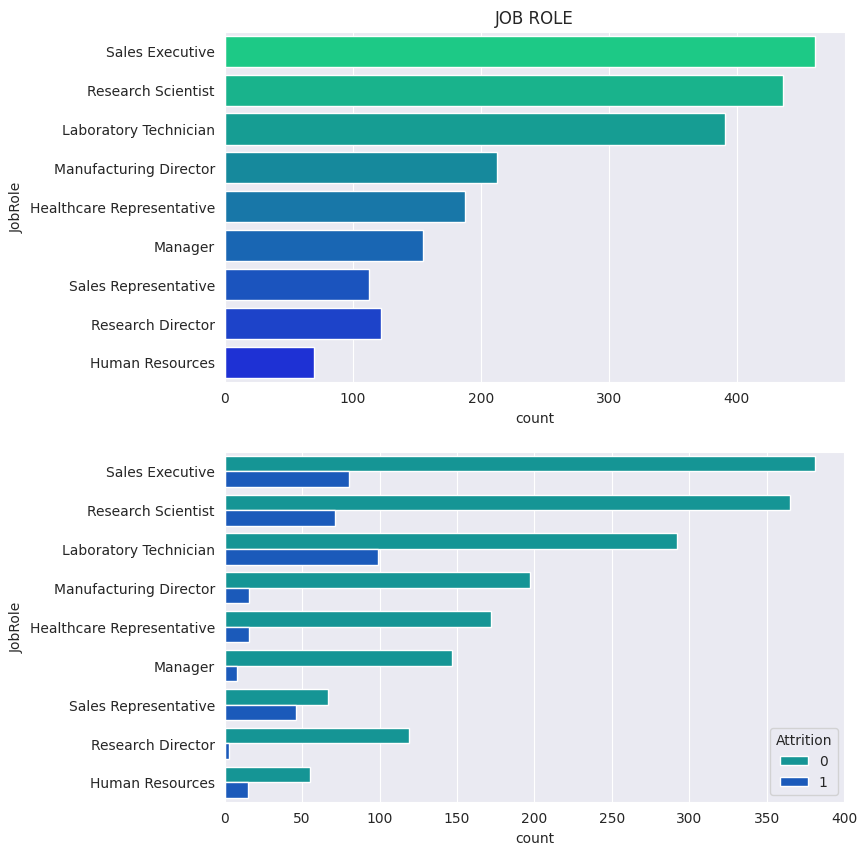

In [ ]:
plt.figure(figsize = (8 , 10))
plt.subplot(2 ,1,1)
sns.countplot(y= 'JobRole' ,data =df_empleados ,palette='winter_r')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
sns.countplot(y= 'JobRole' ,data = df_empleados ,palette='winter_r'  ,hue =df_empleados['Attrition'])

Se observar que "sales executive", "sales representative", y "lab technician"("ejecutivo de ventas", "representante de ventas" y "técnico de laboratorio") tienen más probabilidades de marcharse en comparación con otras funciones.

BusinessTravel(Viajes de negocio) vs Attrition

Travel_Rarely        1509
Travel_Frequently     417
Non-Travel            223
Name: BusinessTravel, dtype: int64


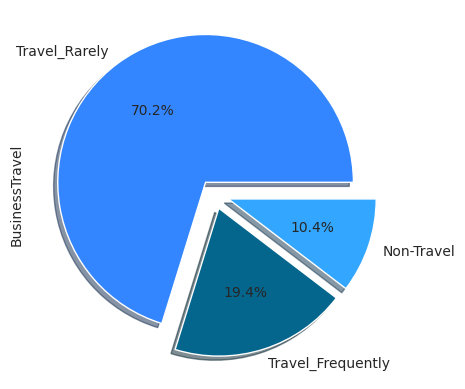

In [ ]:
df_empleados['BusinessTravel'].value_counts().plot(kind='pie',explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#3386FF","#05668d","#33A7FF"])
print(df_empleados['BusinessTravel'].value_counts())

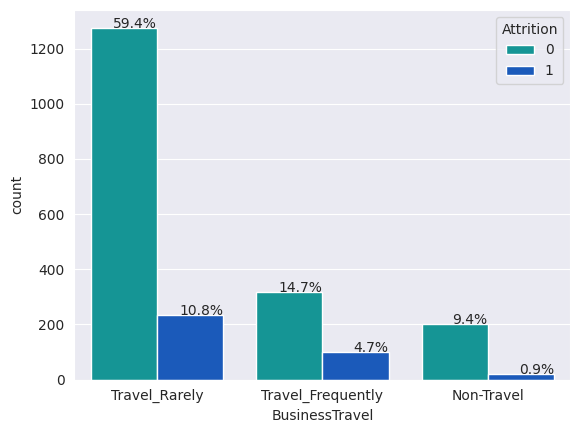

In [ ]:
b=sns.countplot(x= 'BusinessTravel' ,data = df_empleados ,palette='winter_r'  ,hue =df_empleados['Attrition'])
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    b.annotate(percentage, (x, y),ha='right')
    #b.annotate(y,(x,y),ha='left')
plt.show()

Los empleados que viajan poco son los que presentan un número mayor de Attrition, mientras que los empleados que no tienen que viajar son los que presentan menos posibilidades de Attrition.

**OverTime(Horas extras) vs Attrition.**

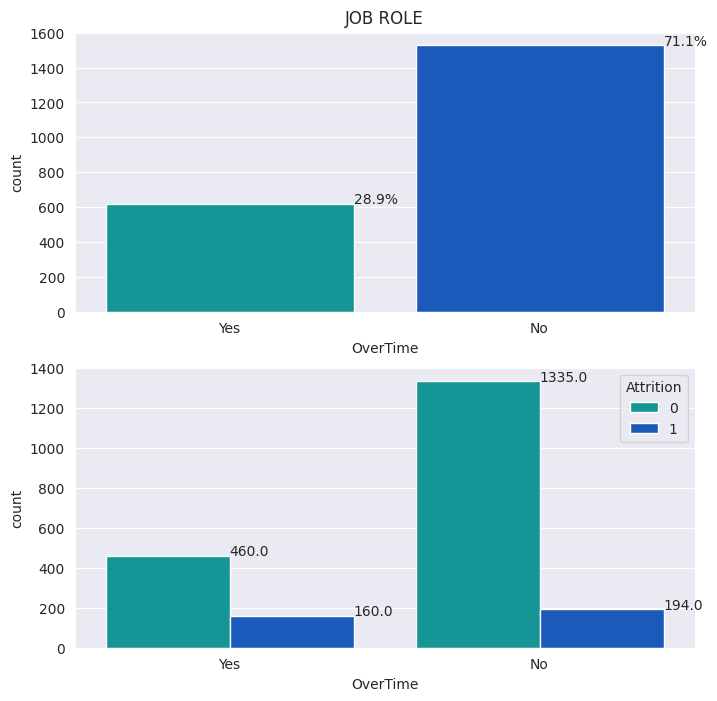

In [ ]:
plt.figure(figsize = (8 , 8))
plt.subplot(2 ,1,1)
a=sns.countplot(x= 'OverTime' ,data =df_empleados ,palette='winter_r')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
b=sns.countplot(x= 'OverTime' ,data = df_empleados ,palette='winter_r'  ,hue =df_empleados['Attrition'])
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='left')
    #a.annotate(y,(x,y),ha='left')
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #b.annotate(percentage, (x, y),ha='left')
    b.annotate(y,(x,y),ha='left')
plt.show()

A los empleados que permanecen en la empresa no se les exigió que hicieran horas extras, mientras que a los empleados que se han ido se les pidió que hicieran horas extras. Se pude considerar una posible causa de Attrition.

**JobInvolvement(Participación) vs Attrition.**

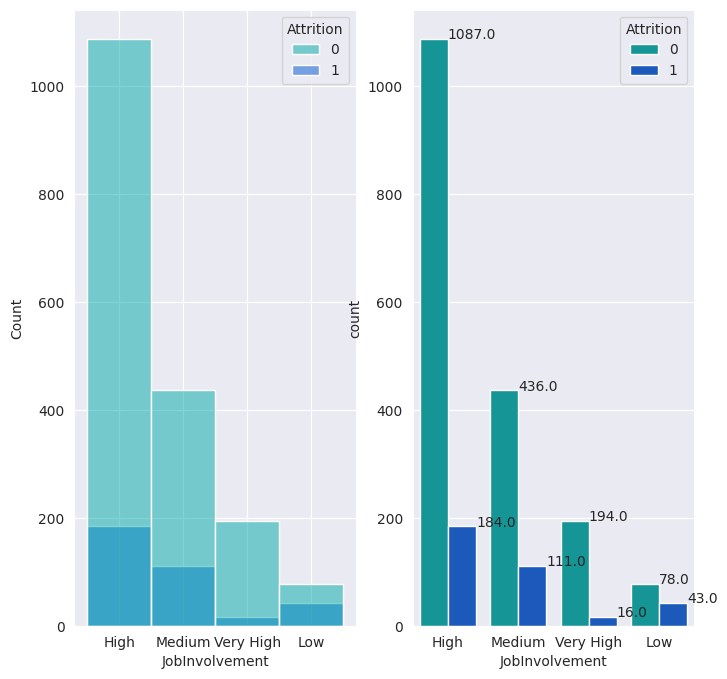

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
df_empleados['JobInvolvement'] = df_empleados['JobInvolvement'].replace([1,2,3,4],['Low','Meduim', 'High', 'Very High'])
a=sns.histplot(x= 'JobInvolvement' ,data = df_empleados ,palette='winter_r' ,hue = df_empleados['Attrition'] )

plt.subplot(1,2,2)
b=sns.countplot(x= 'JobInvolvement' ,data = df_empleados ,palette='winter_r' ,hue = df_empleados['Attrition'])
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #b.annotate(percentage, (x, y),ha='right')
    b.annotate(y,(x,y),ha='left')
plt.show()

La mayoría de los empleados consideran que su implicación en el trabajo es High.

La tasa de abandono de los empleados que consideran que su implicación en el trabajo es Low(35%) es superior a High(14%).

Attrition= JobInvolvement-High(14%) /
JobInvolvement-Medium(20%) /
JobInvolvement-Very High(7%) /
JobInvolvement-Low(35%).

**Work-Life Balance(Equilibrio vida-trabajo), Job Satisfaction(Sastifacción laboral), Relationship Satisfaction(Relación sastifacción), Enviroment Satisfaction(Sastifacción del ambiente labotral) vs Attrition.**

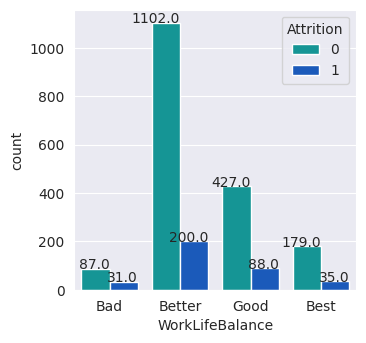

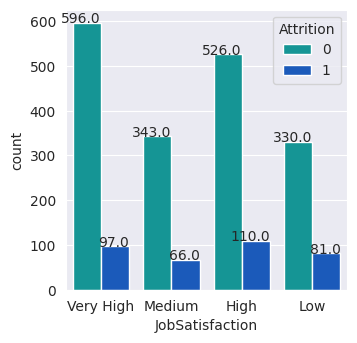

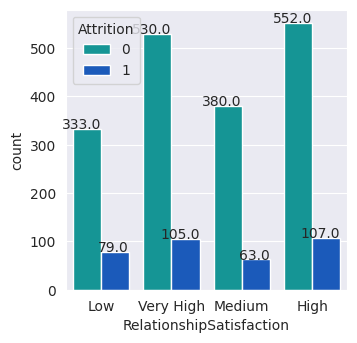

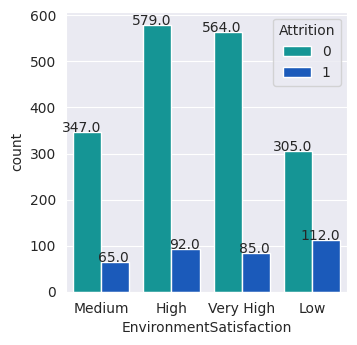

In [ ]:
df_4=df_empleados[['WorkLifeBalance','JobSatisfaction','RelationshipSatisfaction','EnvironmentSatisfaction']]
for i,col in enumerate(df_4.columns):
    plt.figure(figsize = (8 , 8))
    plt.subplot(2 ,2,i+1)
    b=sns.countplot(x= col ,data = df_empleados ,palette='winter_r',hue =df_empleados['Attrition'])
    for p in b.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        #b.annotate(percentage, (x, y),ha='right')
        b.annotate(y,(x,y),ha='right')

Los empleados que no Attrition, la satisfacción con el trabajo, las relaciones y el entorno se situó en gran medida encuentra por encima High.
Los que Atttrition el equilibrio entre la vida laboral y personal se sitúa en Low.

**Years With Curr Manager(Años como gerente) vs Attrition.**

Employee left= Empleado que se va.

Employee stay= Emplaedo que se queda.

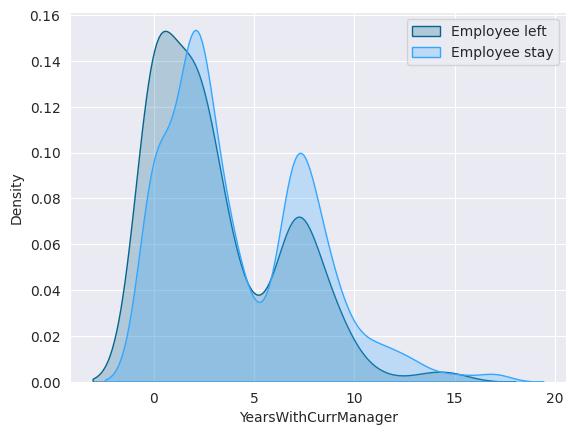

In [ ]:
df_left=df_empleados[df_empleados[ 'Attrition']==1]['YearsWithCurrManager']
df_stay=df_empleados[df_empleados[ 'Attrition']==0]['YearsWithCurrManager']

sns.kdeplot(df_left, label = 'Employee left', fill=True, color = "#05668d" )
sns.kdeplot(df_stay, label = 'Employee stay', fill=True, color = "#33A7FF")
plt.legend()
plt.show()


Se puede observar que los empleados que tienden a irse tienen menos de 2 años con el gerente actual, y tienden a quedarse si tienen más de 5 años.

**Stock Option Level(Nivel de acciones) vs Attrition.**

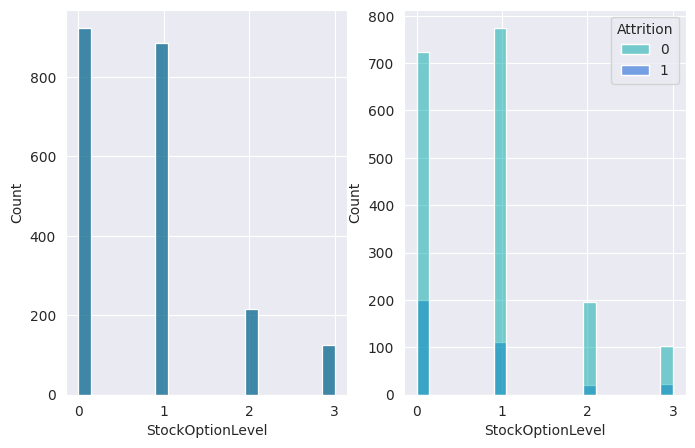

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(x= "StockOptionLevel" ,data = df_empleados ,palette="winter_r")
plt.subplot(1,2,2)
sns.histplot(x= "StockOptionLevel" ,data = df_empleados ,palette="winter_r"  ,hue="Attrition")
plt.show()

En los niveles 0 y 1 hay mayor Attrition.

**Performance Rating (Clasificación de rendimiento) vs Attrition.**

Excellent      1813
Outstanding     336
Name: PerformanceRating, dtype: int64


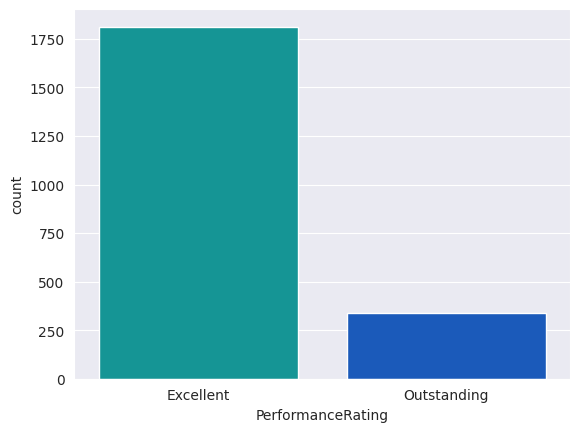

In [ ]:
print(df_empleados['PerformanceRating'].value_counts())
sns.countplot(x= 'PerformanceRating' ,data = df_empleados ,palette='winter_r')
plt.show()

La valoración del rendimiento de los empleados ha sido muy buena. No es determinante de Attrition.

**TotalWorkingYears (Total años trabajados), YearsInCurrentRole(Años en el rol actual), YearsAtCompany(Años en la empresa), TrainingTimesLastYear(Tiempo de entrenamiento del año pasado) vs Atttrition.**

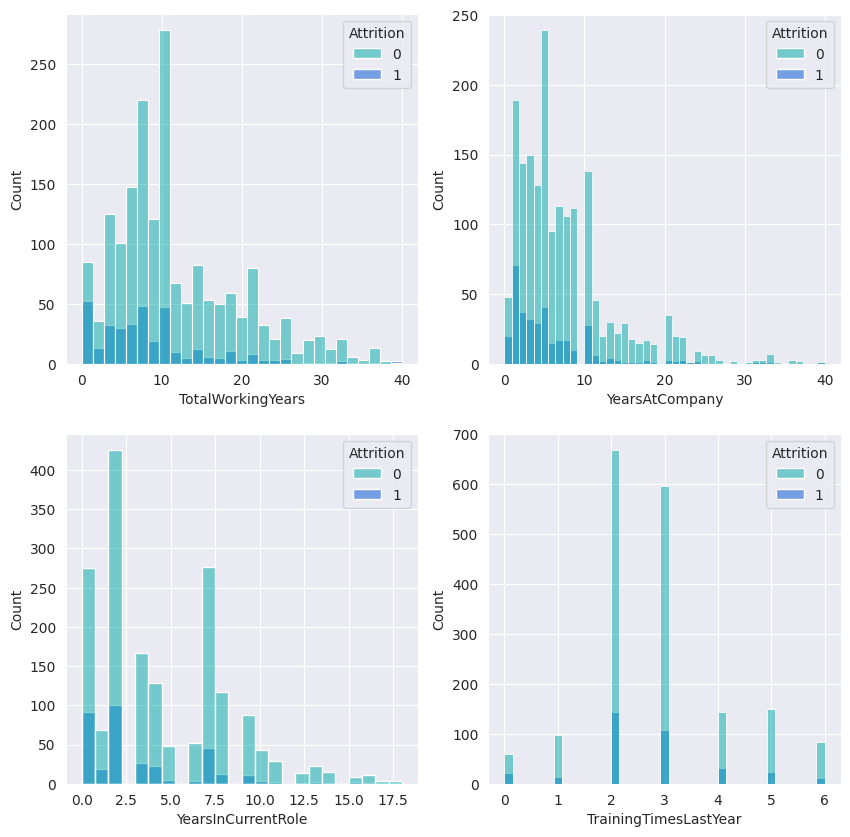

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x= 'TotalWorkingYears' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,2)
sns.histplot(x= 'YearsAtCompany' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,3)
sns.histplot(x= 'YearsInCurrentRole' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,4)
sns.histplot(x= 'TrainingTimesLastYear' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.show()

Se puede ver que más empleados tienden a irse al tener menos de 7 años de experiencia, menos de 5 años de antiguedad, y menos de 2 años en su puesto actual.

**YearsSinceLastPromotion (Años desde la última promoción) vs Attrition.**

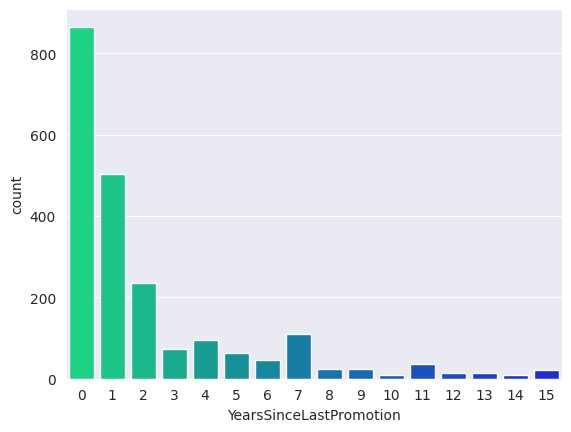

In [ ]:
b=sns.countplot(x= 'YearsSinceLastPromotion' ,data = df_empleados ,palette='winter_r'  )
plt.show()

En la mayoria de los empleados su promoción ha sido hace 2años, y hay empleados con 15 en la empresa sin ninguna promoción, podemos decir que puede ser potencial Attrition.

**NumCompaniesWorked (Nro empresas trabajadas)**

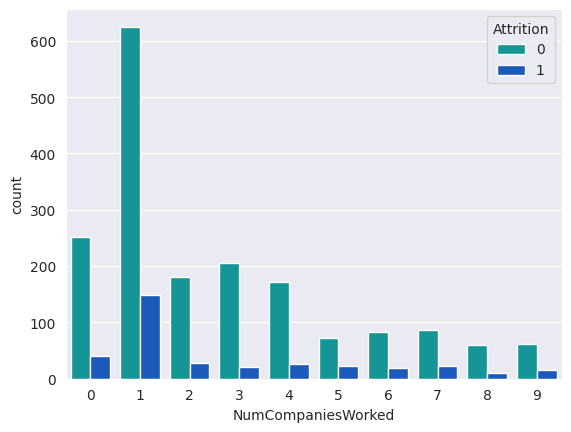

In [ ]:
sns.countplot(x= 'NumCompaniesWorked' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.show()

Los emplado que tienen 1 año de experiencia tienen mayor Attrition.

**MonthlyIncome (Ingresos mensuales) vs Gender (Genero)**

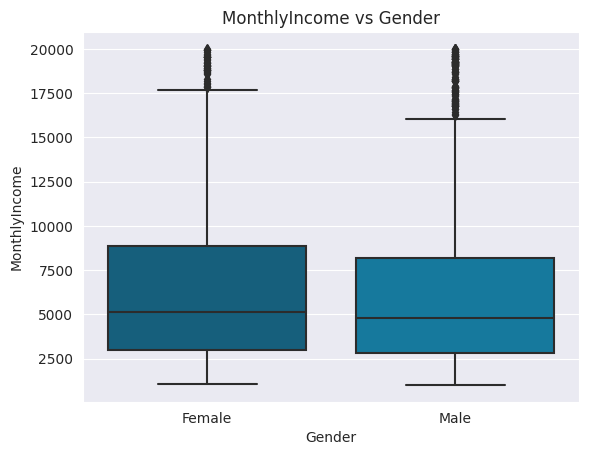

In [ ]:
plt.title('MonthlyIncome vs Gender')
sns.boxplot(x=df_empleados['Gender'],y=df_empleados['MonthlyIncome'])
plt.show()

Podemos ver que las mujeres y los hombres muestran una variabilidad similar, tanto en la media, la mediana y el cuartil. Pero siguen siendo las mujeres quienes tienen por poca diferencia un ingreso mensual mejor.

**Education (Educación) vs MonthlyIncome (Ingresos mensuales).**

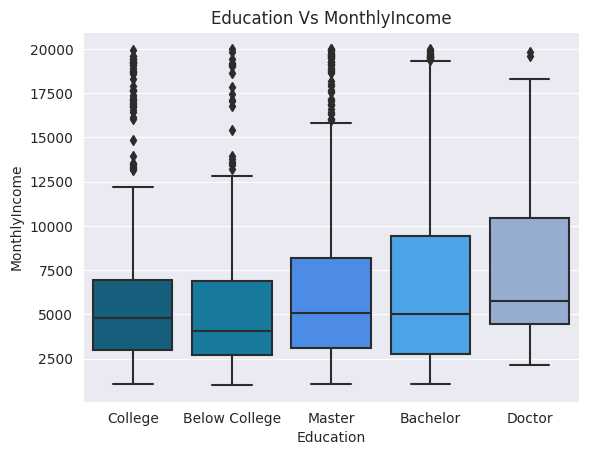

In [ ]:
plt.title('Education Vs MonthlyIncome')
sns.boxplot(x=df_empleados['Education'],y=df_empleados['MonthlyIncome'])
plt.show()

Con el nivel de estudios, aumentan los ingresos medios mensuales.

**MonthlyIncome (Ingresos mensuales) vs  JobRole (Rol)**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

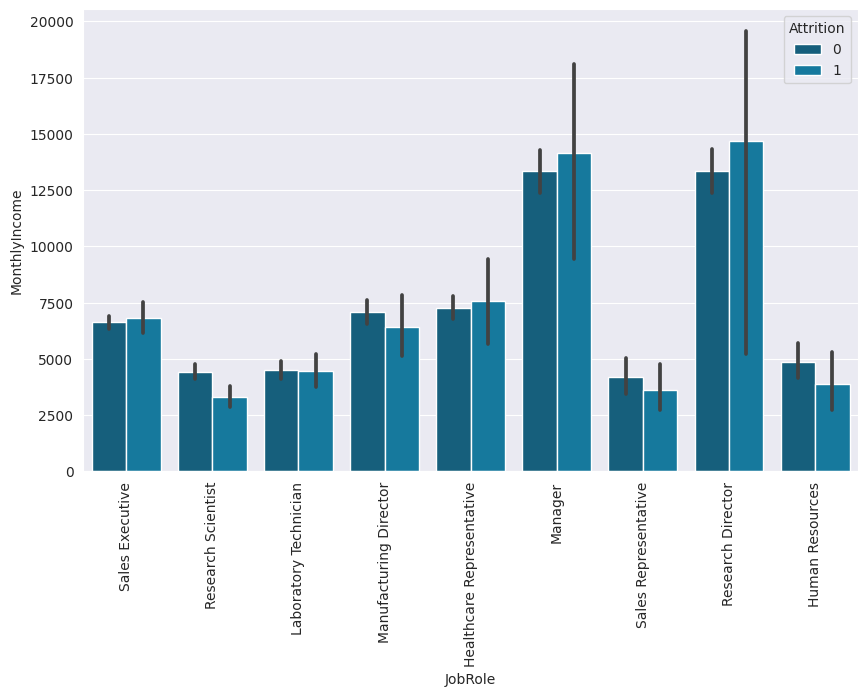

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df_empleados)
plt.xticks(rotation=90)

Podemos observar que los técnicos de laboratorio, los científicos de investigación y los representantes y ejecutivos de ventas tienen salarios muy bajos, lo que podría generar "Attrition". Y también se ve que el departamento de RRHH es el que más abandonos tiene, y también tiene salarios muy bajos.

**MaritalStatus (Estado civil) vs MonthlyIncome (Ingresos mensuales).**

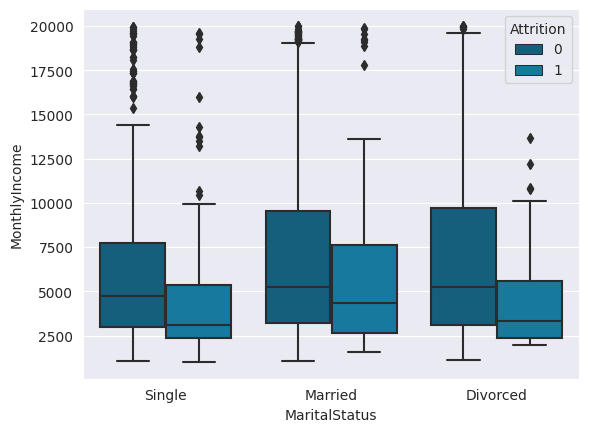

In [ ]:
sns.boxplot(x=df_empleados['MaritalStatus'],y=df_empleados['MonthlyIncome'],hue=df_empleados['Attrition'])
plt.show()

Los empleados solteros tienen ingresos más bajos, son potenciales Attrition.

**Age (Edad) vs JobInvolvement (Participación)**

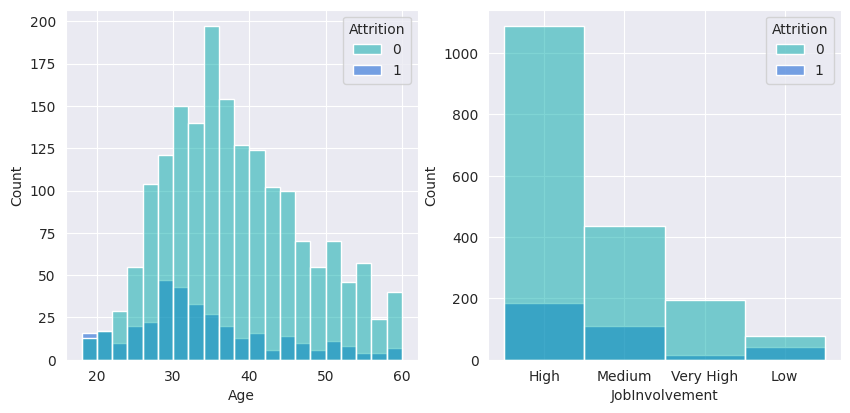

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x= 'Age' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.subplot(2,2,2)
sns.histplot(x= 'JobInvolvement' ,data =df_empleados ,palette='winter_r',hue='Attrition')
plt.show()

Los empleados con baja implicación en el trabajo tienden a ser más jóvenes

**MaritalStatus (Estado civil) vs DistanceFromHome (Diastancia desde casa).**

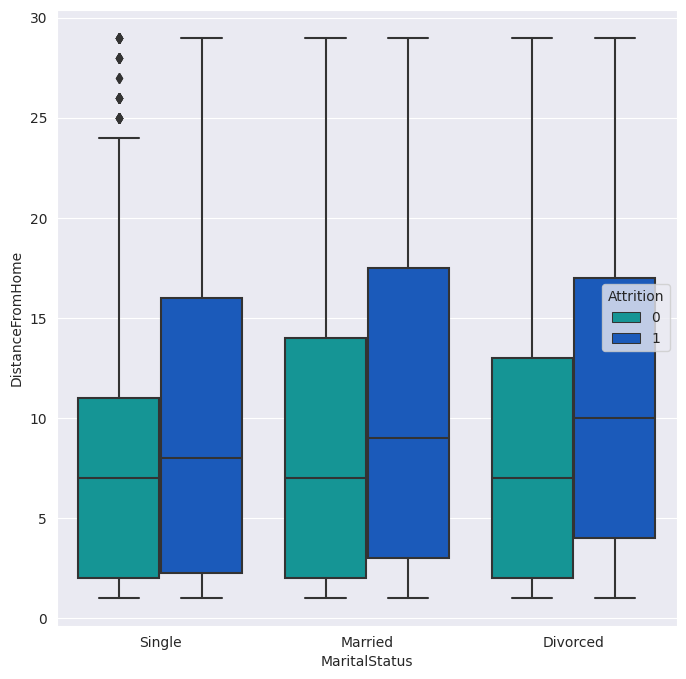

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_empleados['MaritalStatus'],y=df_empleados['DistanceFromHome'],hue=df_empleados['Attrition'],palette='winter_r')
plt.show()

La distancia desde el domicilio podría correlacionarse positivamente con un mayor nivel de Attrition. Además vemos que la mediana de los empleados que abandonan la empresa tuvieron que desplazarse más que los que se quedaron, además de su estado civil.

**OverTime (Horas extras) vs YearsSinceLastPromotion (Años desde la última promoción).**

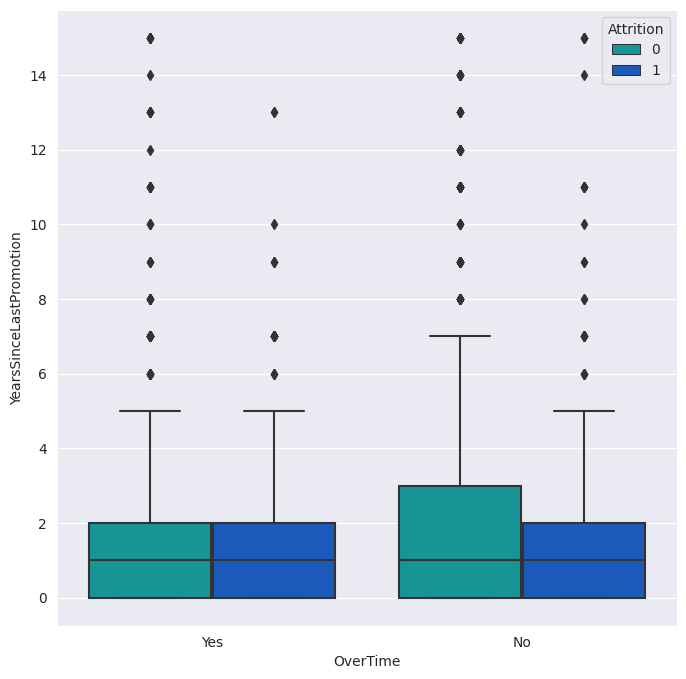

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_empleados['OverTime'],y=df_empleados['YearsSinceLastPromotion'],hue=df_empleados['Attrition'],palette='winter_r')
plt.show()

Los empleados que hacen más horas extras, tardan de media más años en ser ascendidos. Esto podría desmotivar y ser razón de Attrition.

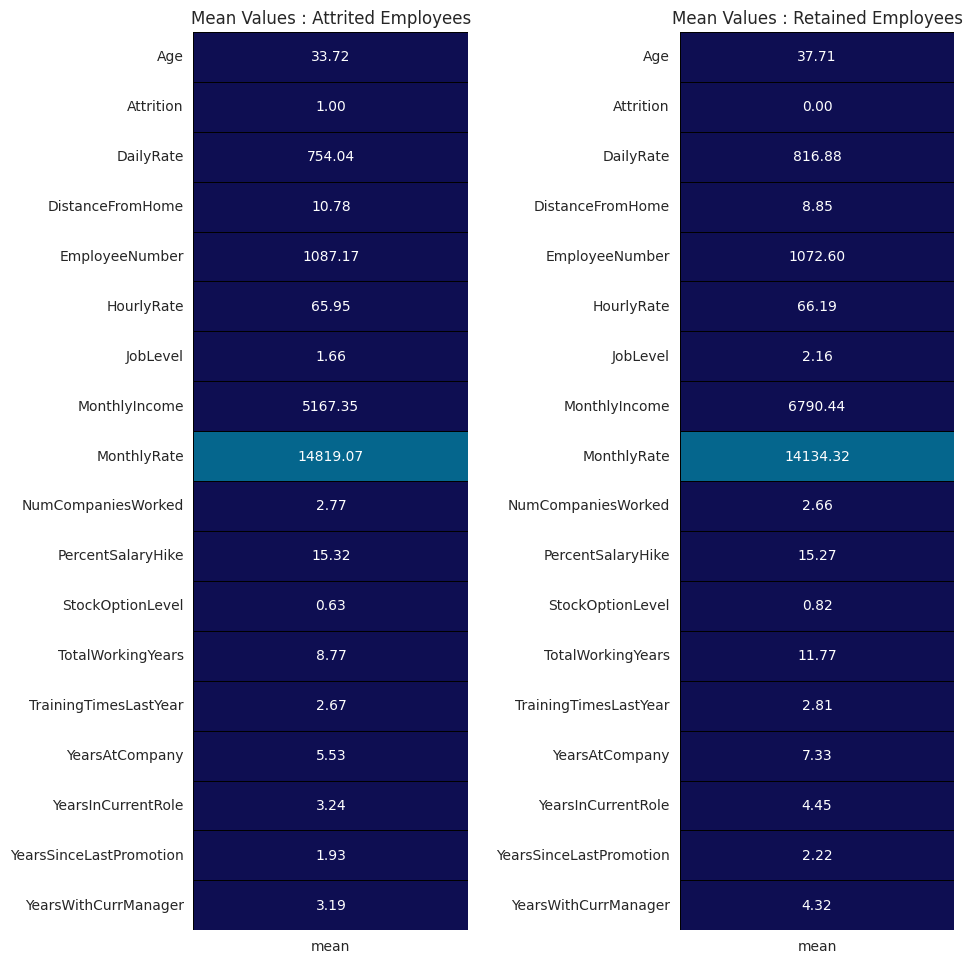

In [ ]:
yes = df_empleados[df_empleados['Attrition'] == 1].describe().T
no = df_empleados[df_empleados['Attrition'] == 0].describe().T

colors = ["#0e0e52","#05668d"]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Attrited Employees');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Retained Employees');

fig.tight_layout(pad = 2)

Valores medios, de todas las características para los casos de empleados que abandonan y empleados que permanecen en la empresa.
Si tenemos en cuenta la edad, los valores medios de los empleados que se quedan son 37,71, es decir, más que los empleados que se van, 33,72.
Del mismo modo, DailyRate y JobLevel son más altos para los empleados que se quedan que para los que se van.
Los empleados que se quedan tienen valores más altos para las características : TotalWorkingYears, YearsAtCompany, YearsInCurrentRole & YearsWithCurrManager.

# **Feature Engineering**

**Estadísticas de las columnas numéricas.**

In [ ]:
df_empleados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,37.05,9.25,18.0,30.0,36.0,43.0,60.0
Attrition,2149.0,0.16,0.37,0.0,0.0,0.0,0.0,1.0
DailyRate,2149.0,806.53,405.70,102.0,465.0,809.0,1158.0,1499.0
DistanceFromHome,2149.0,9.17,8.10,1.0,2.0,7.0,14.0,29.0
EmployeeNumber,2149.0,1075.00,620.51,1.0,538.0,1075.0,1612.0,2149.0
HourlyRate,2149.0,66.16,20.35,30.0,48.0,66.0,84.0,100.0
JobLevel,2149.0,2.08,1.13,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,2149.0,6523.07,4753.57,1009.0,2875.0,4907.0,8446.0,19999.0
MonthlyRate,2149.0,14247.12,7052.85,2094.0,8202.0,14074.0,20338.0,26999.0
NumCompaniesWorked,2149.0,2.68,2.50,0.0,1.0,2.0,4.0,9.0


In [ ]:
df_empleados = df_empleados.replace(r'^\s*$', np.nan, regex=True)

Seguimos la transformación de categórico a numérico, para una mayor eficiencia.

In [ ]:
obj_dtypes= [i for i in df_empleados.select_dtypes(include=np.object).columns]
obj_dtypes

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in obj_dtypes:
    df_empleados[feat] = le.fit_transform(df_empleados[feat].astype(str))
print (df_empleados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2149 non-null   int64
 1   Attrition                 2149 non-null   int64
 2   BusinessTravel            2149 non-null   int64
 3   DailyRate                 2149 non-null   int64
 4   Department                2149 non-null   int64
 5   DistanceFromHome          2149 non-null   int64
 6   Education                 2149 non-null   int64
 7   EducationField            2149 non-null   int64
 8   EmployeeNumber            2149 non-null   int64
 9   EnvironmentSatisfaction   2149 non-null   int64
 10  Gender                    2149 non-null   int64
 11  HourlyRate                2149 non-null   int64
 12  JobInvolvement            2149 non-null   int64
 13  JobLevel                  2149 non-null   int64
 14  JobRole                   2149 non-null 

In [ ]:
df_empleados.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1899,31,0,1,793,2,20,0,1,1900,0,1,67,3,1,8,1,2,7484,25796,3,0,20,1,0,0,23,1,3,13,12,12,8
985,31,1,2,330,1,22,4,3,986,3,1,98,0,2,4,0,1,6179,21057,1,1,15,0,3,2,10,3,3,10,2,6,7
574,34,0,2,182,1,1,4,1,575,2,0,72,3,1,6,3,2,3280,13551,2,0,16,0,0,0,10,2,2,4,2,1,3
1668,38,0,2,1261,1,2,4,1,1669,3,1,88,0,2,4,3,1,3691,4605,1,1,15,0,2,1,7,3,1,7,7,5,6
191,27,0,2,894,1,9,0,3,192,3,0,99,0,1,6,2,2,2279,11781,1,0,16,0,3,0,7,2,3,7,7,0,3
1904,29,0,1,490,1,10,0,1,1905,3,0,61,0,1,6,3,2,7428,14506,2,0,12,0,1,0,12,3,2,5,3,1,3
943,46,0,2,991,0,1,2,1,944,3,0,44,0,1,1,1,2,3423,22957,6,0,12,0,0,0,10,3,1,7,6,5,7
575,54,0,2,376,1,19,4,3,576,3,0,95,0,2,4,1,0,5485,22670,9,1,11,0,2,2,9,4,2,5,3,1,4
878,42,0,0,179,0,2,3,3,879,3,1,79,3,2,1,1,1,6272,12858,7,0,16,0,1,1,10,3,1,4,3,0,3
613,34,0,2,829,0,3,2,0,614,0,1,88,0,1,1,3,1,3737,2243,0,0,19,0,0,1,4,1,0,3,2,0,2


In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, prediction)

    plt.title('ROC Curve')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    auc = np.trapz(tpr, fpr)
    print('AUC:', auc)

def model_evaluation(classifier,x_test,y_test):

    #Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    #Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## **Construcción de modelos, para encontrar el mejor algoritmo.**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

pd.set_option('display.max_columns', 0)

In [ ]:
df_empleados.drop(columns = ["MonthlyRate", "DailyRate", "HourlyRate"], inplace = True)
df_empleados.shape

(2149, 29)

In [ ]:
MMS = MinMaxScaler()
# get dummies
dummies = pd.get_dummies(df_empleados[df_empleados.columns.difference(["Attrition"])])
X = MMS.fit_transform(dummies)
# Se define variable target
y = df_empleados[["Attrition"]].values.ravel()

In [ ]:
df_empleados

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,1,2,0,0,2,7,3,2,5993,8,1,11,0,1,0,8,0,0,6,4,0,5
1,49,0,1,1,8,1,1,2,0,1,2,2,6,2,1,5130,1,0,23,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1,2,2,4,3,3,1,2,1,2,0,2,2090,6,1,15,0,2,0,7,3,2,0,0,0,0
3,33,0,1,1,3,4,1,4,3,0,0,1,6,0,1,2909,1,1,11,0,0,0,8,3,2,8,7,3,0
4,27,0,2,1,2,1,3,5,1,1,0,1,2,2,1,3468,9,0,12,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,29,0,2,2,19,0,1,2145,0,1,2,2,7,0,1,5296,1,0,17,0,2,1,8,3,2,8,7,7,7
2145,30,0,2,0,1,0,1,2146,0,1,0,1,1,3,2,6781,3,0,23,1,2,0,14,6,2,1,0,0,0
2146,55,0,2,1,4,4,1,2147,3,1,0,2,0,2,2,2174,1,1,11,0,0,0,3,3,2,3,2,1,2
2147,33,0,2,1,4,4,3,2148,1,0,2,1,2,3,2,6653,4,0,15,0,2,0,7,6,2,1,0,0,0


**Dividimos los datos.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, shuffle = True)

In [ ]:
Counter(y_train)

Counter({0: 1337, 1: 274})

**¿Se puede predecir quién abandonará la empresa?**

**Logistic Regression**

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [ ]:
y_pred = log_reg_model.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))

Model accruracy score: 0.8568773234200744


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       458
           1       0.62      0.10      0.17        80

    accuracy                           0.86       538
   macro avg       0.74      0.54      0.55       538
weighted avg       0.83      0.86      0.81       538



Podemos ver que el modelo predice bastante bien a quienes no se van (92% de precisión), pero no predice tan bien a quienes se podrian ir (17% de precisión).

**Random Forest**

In [ ]:
random_forest_model = RandomForestClassifier(random_state = 0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = random_forest_model.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))

Model accruracy score: 0.862453531598513


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       458
           1       0.69      0.14      0.23        80

    accuracy                           0.86       538
   macro avg       0.78      0.56      0.58       538
weighted avg       0.84      0.86      0.82       538



Nuevamente vemos que el modelo predice bien a quienes no se van (92% de precisión), pero tiene una mala predicción de los que pordrían irse (23% de precisión).

-Seleccionamos características y variable target.

-Convertimos las restantes variables categóricas en numéricas.

-Dividimos los datos en conjuntos de entrenamiento y de prueba.

-Creamos el modelo Random Forest Classifier.

-Entrenamos el modelo con los datos de entrenamiento.

-Hacemos predicciones con los datos de prueba.

-Calculamos la precisión del modelo.

-Imprimimos la precisión del modelo.

In [ ]:
X = df_empleados.drop(['Attrition'], axis=1)
y = df_empleados['Attrition']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Random Forest Classifier accuracy:', accuracy)

Random Forest Classifier accuracy: 0.8348837209302326


El accuracy obtenido del modelo Random Forest Classifier nos indica lo bien que el modelo es capaz de predecir si un empleado abandonará la empresa (Attrition= yes) o se quedará (Attrition= No) basándose en las características dadas. En este caso, el accuracy score indica que el modelo es capaz de predecir correctamente el resultado de aproximadamente el 84% de las muestras de datos de prueba.

**Regresión Logistica 2**

In [ ]:
obj_dtypes= [i for i in df_empleados.select_dtypes(include=np.object).columns]
obj_dtypes

[]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in obj_dtypes:
    df_empleados[feat] = le.fit_transform(df_empleados[feat].astype(str))
print (df_empleados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2149 non-null   int64
 1   Attrition                 2149 non-null   int64
 2   BusinessTravel            2149 non-null   int64
 3   Department                2149 non-null   int64
 4   DistanceFromHome          2149 non-null   int64
 5   Education                 2149 non-null   int64
 6   EducationField            2149 non-null   int64
 7   EmployeeNumber            2149 non-null   int64
 8   EnvironmentSatisfaction   2149 non-null   int64
 9   Gender                    2149 non-null   int64
 10  JobInvolvement            2149 non-null   int64
 11  JobLevel                  2149 non-null   int64
 12  JobRole                   2149 non-null   int64
 13  JobSatisfaction           2149 non-null   int64
 14  MaritalStatus             2149 non-null 

In [ ]:
df_empleados.sample(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
418,26,0,2,1,23,0,1,419,1,0,0,1,6,3,0,2886,1,0,22,1,2,2,3,3,0,3,2,0,2
2106,24,0,2,2,4,1,3,2107,3,0,0,2,7,2,1,4941,2,0,15,0,1,0,11,3,3,8,2,7,7
2074,25,0,2,2,18,1,1,2075,1,1,3,2,7,3,2,2115,1,0,12,0,2,0,17,3,2,17,12,5,7
1859,46,0,2,1,8,4,1,1860,3,0,2,2,6,0,2,5473,7,0,11,0,3,0,20,2,3,4,3,1,3
67,45,0,2,1,7,0,1,68,2,1,0,3,6,1,0,9724,2,0,17,0,0,1,25,2,2,1,0,0,0
279,50,0,2,1,4,1,1,280,1,1,0,5,5,2,0,19144,3,0,14,0,1,2,28,4,3,10,4,1,6
1645,56,0,2,1,8,0,1,1646,0,0,0,1,6,3,2,8858,0,0,11,0,2,0,15,2,3,14,8,7,8
1547,45,0,2,1,6,4,4,1548,3,1,0,3,5,0,1,2329,3,0,15,0,2,0,13,2,1,7,7,5,2
1451,38,0,2,2,10,2,1,1452,1,0,0,2,7,3,1,5343,1,0,11,0,0,1,10,1,2,10,7,1,9
1310,58,0,1,1,15,4,1,1311,1,1,0,4,5,0,1,15787,2,1,14,0,2,0,23,3,2,2,2,2,2


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=5)

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.8475879720659029


In [ ]:
logreg = LogisticRegression(C = 100,
                            penalty = 'l2',
                            solver = 'newton-cg',
                           )
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.8209302325581396


In [ ]:
import sklearn.metrics as metrics

In [ ]:
classification_report_tuned = metrics.classification_report(y_test , y_pred)
print(classification_report_tuned)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       358
           1       0.27      0.04      0.07        72

    accuracy                           0.82       430
   macro avg       0.55      0.51      0.49       430
weighted avg       0.74      0.82      0.76       430



In [ ]:
acc_scr_log_yuned= (accuracy_score(y_test , y_pred))
print('Overall accuracy of logistic regression model:', acc_scr_log_yuned)

Overall accuracy of logistic regression model: 0.8209302325581396


Precisión del modelo de regresión logística 83%.

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


**Equilibrio de datos mediante SMOTE.**

Como hemos dicho antes tenemos un problemas la clasificación desequilibrada, ya que hay muy pocos ejemplos de la clase “Attrition Yes” para que el modelo aprenda efectivamente, aplicaremos SMOTE.

In [ ]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
x = df_empleados.drop("Attrition", axis=1)

In [ ]:
cols = list(df_empleados.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df_empleados.loc[:,cols]
t1 = df_empleados.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({1: 1525, 0: 1795})

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

Matriz de correlación

In [ ]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

Para visualizar la matriz de correlaciones, creamos un nuevo marco de datos que contiene los valores de x_train & y_train.
De este modo, rechazamos todo lo que esté fuera de los datos de entrenamiento para evitar la fuga de datos.

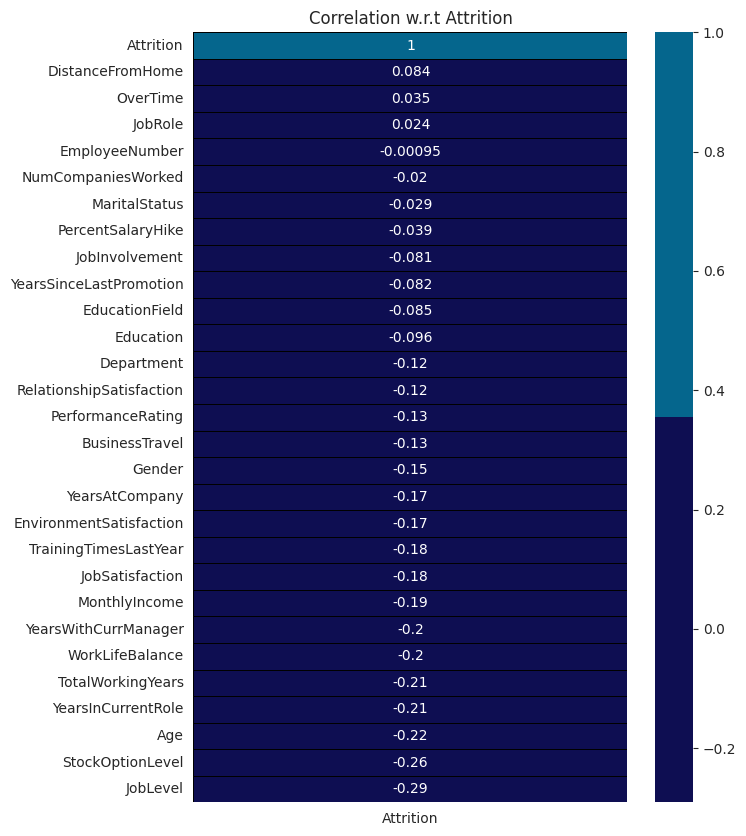

In [ ]:
corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');

**Selección de funciones numéricas.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
ss = StandardScaler()

# Normalization
x_train['MonthlyIncome'] = mms.fit_transform(x_train[['MonthlyIncome']]); x_test['MonthlyIncome'] = mms.transform(x_test[['MonthlyIncome']])
x_train['TotalWorkingYears'] = mms.fit_transform(x_train[['TotalWorkingYears']]); x_test['TotalWorkingYears'] = mms.transform(x_test[['TotalWorkingYears']])
x_train['YearsAtCompany'] = mms.fit_transform(x_train[['YearsAtCompany']]); x_test['YearsAtCompany'] = mms.transform(x_test[['YearsAtCompany']])
x_train['YearsInCurrentRole'] = mms.fit_transform(x_train[['YearsInCurrentRole']]); x_test['YearsInCurrentRole'] = mms.transform(x_test[['YearsInCurrentRole']])
x_train['YearsWithCurrManager'] = mms.fit_transform(x_train[['YearsWithCurrManager']]); x_test['YearsWithCurrManager'] = mms.transform(x_test[['YearsWithCurrManager']])

# Standardization
x_train['Age'] = ss.fit_transform(x_train[['Age']]); x_test['Age'] = ss.transform(x_test[['Age']])
x_train['Education'] = ss.fit_transform(x_train[['Education']]); x_test['Education'] = ss.transform(x_test[['Education']])
x_train['EnvironmentSatisfaction'] = ss.fit_transform(x_train[['EnvironmentSatisfaction']]); x_test['EnvironmentSatisfaction'] = ss.transform(x_test[['EnvironmentSatisfaction']])
x_train['JobInvolvement'] = ss.fit_transform(x_train[['JobInvolvement']]); x_test['JobInvolvement'] = ss.transform(x_test[['JobInvolvement']])
x_train['JobLevel'] = ss.fit_transform(x_train[['JobLevel']]); x_test['JobLevel'] = ss.transform(x_test[['JobLevel']])
x_train['JobSatisfaction'] = ss.fit_transform(x_train[['JobSatisfaction']]); x_test['JobSatisfaction'] = ss.transform(x_test[['JobSatisfaction']])
x_train['OverTime'] = ss.fit_transform(x_train[['OverTime']]); x_test['OverTime'] = ss.transform(x_test[['OverTime']])
x_train['RelationshipSatisfaction'] = ss.fit_transform(x_train[['RelationshipSatisfaction']]); x_test['RelationshipSatisfaction'] = ss.transform(x_test[['RelationshipSatisfaction']])
x_train['StockOptionLevel'] = ss.fit_transform(x_train[['StockOptionLevel']]); x_test['StockOptionLevel'] = ss.transform(x_test[['StockOptionLevel']])
x_train['TrainingTimesLastYear'] = ss.fit_transform(x_train[['TrainingTimesLastYear']]); x_test['TrainingTimesLastYear'] = ss.transform(x_test[['TrainingTimesLastYear']])
x_train['WorkLifeBalance'] = ss.fit_transform(x_train[['WorkLifeBalance']]); x_test['WorkLifeBalance'] = ss.transform(x_test[['WorkLifeBalance']])

A partir de la transformación anterior, ajustamos los datos, a los datos de entrenamiento, y transformamos los de prueba a partir de la información basada en los datos de entrenamiento.

**Modelo**

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import cross_val_score


**RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score: 86.23%
ROC_AUC Score: 79.62%


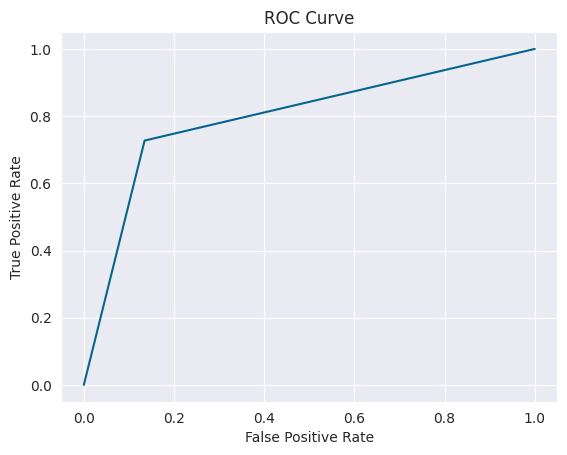

AUC: 0.796220633299285
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       267
           1       0.82      0.73      0.77       231

    accuracy                           0.80       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.80      0.80      0.80       498



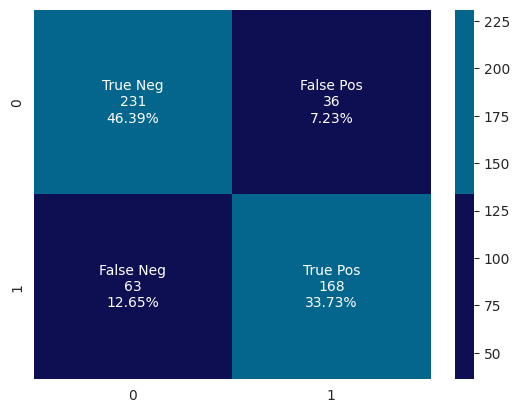

In [ ]:
model(classifier_rf,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_rf,x_test.values,y_test.values)

**RandomForest Classifier:** La validación cruzada del 86,80 % sugiere que el modelo funciona bien con los datos con los que se entrenó, ósea el modelo logró una precisión relativamente alta durante este proceso de evaluación.
Por otro lado, una puntuación ROC_AUC del 77,99% sugiere que su modelo tiene un poder discriminatorio razonablemente bueno, aunque no es tan alto como la puntuación de validación cruzada. Esto indica que el modelo funciona bien en términos de precisión pero puede no tener el mismo nivel de rendimiento cuando se trata de distinguir entre las clases positivas y negativas.


**XGBoostClassifier.**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score: 92.41%
ROC_AUC Score: 84.37%


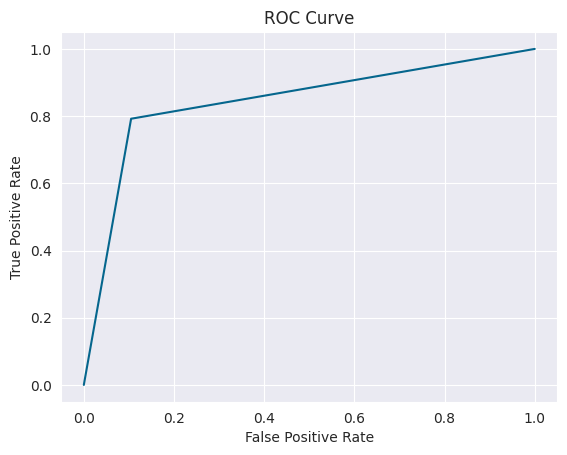

AUC: 0.8436694391750571
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       267
           1       0.87      0.79      0.83       231

    accuracy                           0.85       498
   macro avg       0.85      0.84      0.85       498
weighted avg       0.85      0.85      0.85       498



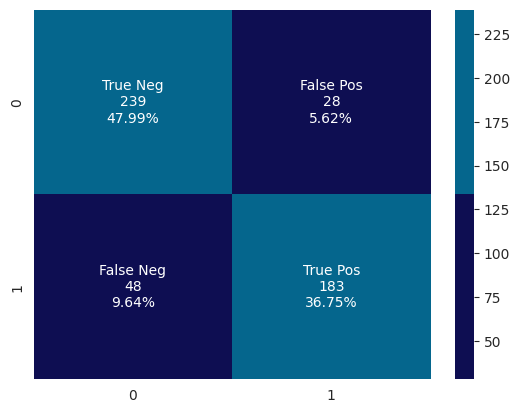

In [ ]:
model(classifier_xgb,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_xgb,x_test.values,y_test.values)

**XGBoostClassifier**: La validación cruzada del 92,41 % indica la precisión promedio del XGBoostClassifier cuando se evalúa mediante la validación cruzada. En este caso, el XGBoostClassifier logró una precisión promedio del 92,41 % en todos los pliegues de validación cruzada.
La puntuación de AUC del 84,37 % alude que XGBoostClassifier tiene una buena capacidad para distinguir entre clases positivas y negativas. Estos puntajes indican que XGBoostClassifier está funcionando bien en la tarea de clasificación, logrando una alta precisión y un buen nivel de discriminación entre clases.


 **LGBMClassifier.**

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score: 92.70%
ROC_AUC Score: 83.78%


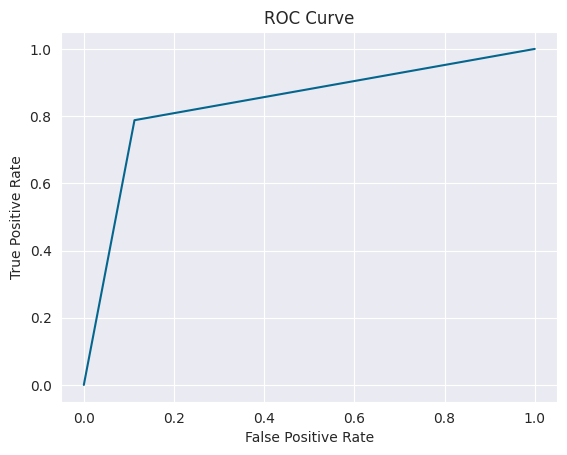

AUC: 0.837759618658495
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       267
           1       0.86      0.79      0.82       231

    accuracy                           0.84       498
   macro avg       0.84      0.84      0.84       498
weighted avg       0.84      0.84      0.84       498



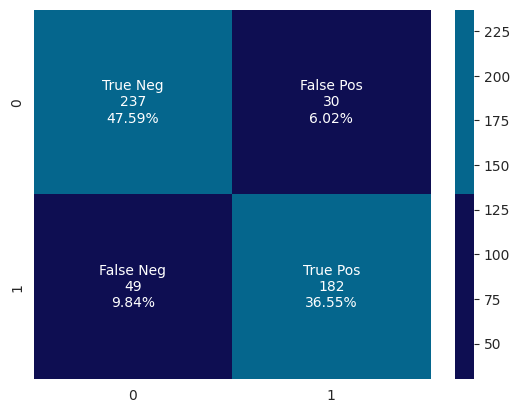

In [ ]:
model(classifier_lgbm,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_lgbm,x_test.values,y_test.values)

**LGBMClassifier**
La validación cruzada del 92,70% indica la precisión promedio del LGBMClassifier cuando se evalúa mediante validación cruzada.
La puntuación ROC_AUC del 83,78 % indica que LGBMClassifier funciona bien para distinguir entre clases positivas y negativas.
En general, tiene una puntuación alta de validación cruzada y una puntuación ROC_AUC relativamente buena, el LGBMClassifier parece ser bueno para las tareas de clasificación.


**Decision Tree Classifier.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score: 79.66%
ROC_AUC Score: 72.93%


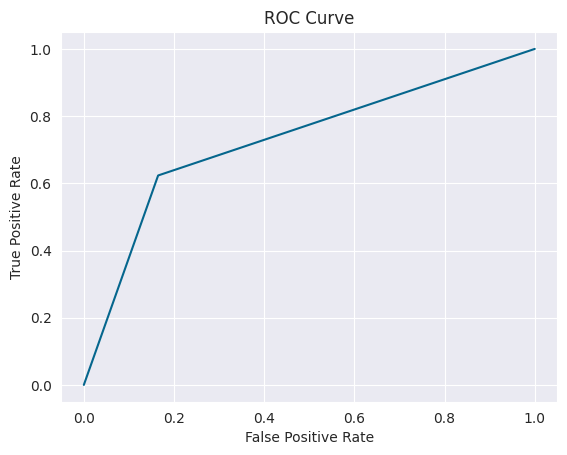

AUC: 0.7292913079429933
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       267
           1       0.77      0.62      0.69       231

    accuracy                           0.74       498
   macro avg       0.74      0.73      0.73       498
weighted avg       0.74      0.74      0.73       498



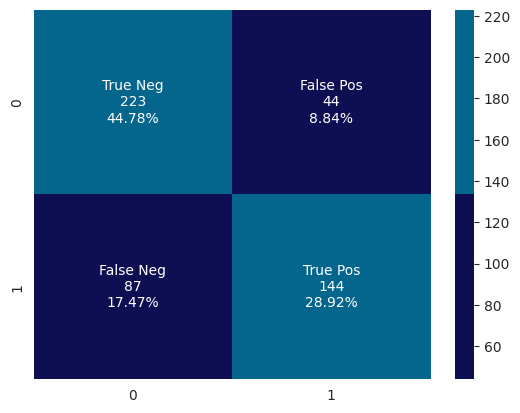

In [ ]:
model(classifier_dt,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_dt,x_test.values,y_test.values)

**Decision Tree Classifier:** La validación cruzada del 80,28 % indica que el modelo del clasificador del árbol de decisiones ha logrado un rendimiento razonablemente bueno en el conjunto de datos.
Una puntuación AUC (Área bajo la curva) del 73,40% sugiere que el modelo tiene un nivel moderado de poder discriminatorio para distinguir entre las clases positivas y negativas.
Ambos puntajes indican que el modelo tiene cierta capacidad predictiva, pero hay que mejorar.


## **Conclusión:**

Descubrimos factores que afectan a la deserción de los empleados, y así a continuación, tomar medidas para reducir esta tasa.
Construimos un modelo, basado en los factores de los empleados, para predecir si es probable que ese empleado se desvincule o no.

A continuación, se describen las principales observaciones:



•	Los hombres tienen un mayor índice de abandono.

•	Las mujeres ganan un poco más que los hombres.

•	Un empleado con 6 años en su puesto actual gana más que uno con 14 años en su puesto actual.

•	Los profesionales jóvenes son más propensos a dejar la empresa.

•	Los representantes de ventas tienden a abandonar más otros, porque sus ingresos son inferiores.

•	A medida que aumenta el nivel de estudios, aumentan los ingresos medios mensuales.

•	Los empleados tienden a marcharse más cuando la distancia al domicilio es superior a 10 km.

•	Los empleados solteros tienden a marcharse porque tienen ingresos mensuales más bajos que los demás.

•	Es necesario implantar una estructura innovadora para los empleados con 1 año de experiencia, ya que contribuye en gran medida al porcentaje de abandono.

•	Es necesario idear mejores opciones sobre acciones para las personas con más de 6 años en su puesto actual, ya que el desgaste parece aumentar gradualmente con una caída de los ingresos mensuales.

•	Los empleados insatisfechos con las condiciones del entorno y la JobSatisfaction tienden a marcharse más en comparación con los demás.


## **Para prevenir el desgaste se sugierire:**

• Retribuir equitativamente a los empleados con el mismo nivel de trabajo, la misma implicación en el trabajo y la misma función, con ingresos mensuales y acciones casi iguales.

• Aumentar en sueldos de a aquellos empleados hagan horas extras, y asegurarse de que a los que las hacen se les pague más que a los que no las hacen.

• La formación debe impartirse por niveles, y el número de sesiones debe depender de las necesidades específicas de cada departamento.

• Los directivos deben recibir formación sobre los requisitos de su función, así como sobre la forma de impartir una formación eficaz a los miembros de su equipo.

• Se pudo ver fuertes características que podrían determinar el desgaste de los empleados, tales como (Tiempo extra, Distancia de casa, Años desde la última promoción), se debería empezar trabajando en ello.
